In [1]:
# !pip install pywaffle
# !pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywaffle as pyw
import geopandas as gpd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#change the default option of displaying rows and columns to 999, so that I won't miss any columns with missing values.
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# custom color palette
custom_colors = ["#023e8a", "#0096c7","#90e0ef","#ff5400","#ffbd00"]

In [3]:
# read the data
data = pd.read_csv("data/DDS11_Data_Extract_with_labels.csv",dtype=str)
data.shape

(2131, 198)

# Problem Statement: Who is willing to pay more for higher speed Internet?
## In the question 29, each respondent is asked how much more they are willing to pay to double their download speed. Based on the whole dataset, we are going to study and predict who is willing to pay for higher Internet speed based on certain important features.

# Part1: Exploratory Data Analysis

### Based on the problem mentioned above, we decided to use owning home Internet access as a filter 

In [4]:
# Filter the data frame
internet_df = data[data['Q26 - Which of the following subscriptions does your household purchase?-Home internet'] == 'Yes']
internet_df

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,QNEW2 - How old are the children in your home?-5-9 years,QNEW2 - How old are the children in your home?-10-13 years,QNEW2 - How old are the children in your home?-14-18 years,QNEW2 - How old are the children in your home?-19-25 years,QNEW2 - How old are the children in your home?-26+ years,QNEW2 - How old are the children in your home?-Don't Know,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the followin

## 1.2 Demographic questions data cleaning & analytics

### 1.2.1 Age

In [5]:
#slice out all demographic data
df_dmg = internet_df.iloc[:,1:17,]

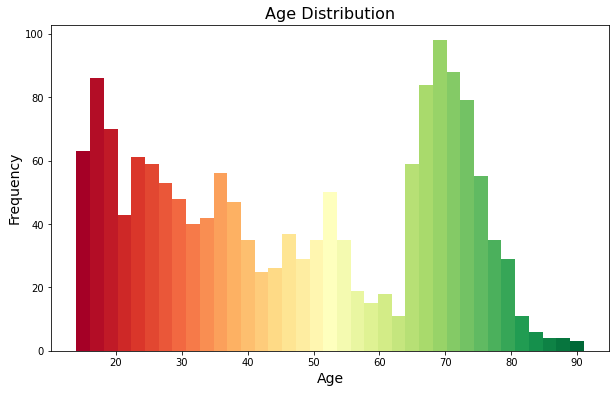

In [6]:
#draw histogram of age distribution
plt.figure(figsize=(10,6))

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlGn')

#plt.hist(df_dmg['Q1r1 - To begin, what is your age?'].astype(float), color='#006699', edgecolor='black', linewidth=1.2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution', fontsize=16)

# Plot histogram.
n, bins, patches = plt.hist(df_dmg['Q1r1 - To begin, what is your age?'].astype(float), 37, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show()

### Our targeted customers' age falls in 16-26 and 68-70 age group.

### 1.2.2 Gender

In [7]:
#count gender
counts = df_dmg['Q4 - What is your gender?'].value_counts()
gender_df = pd.DataFrame(counts)
gender_df['percent'] = (gender_df['Q4 - What is your gender?'] /gender_df['Q4 - What is your gender?'].sum()) * 100

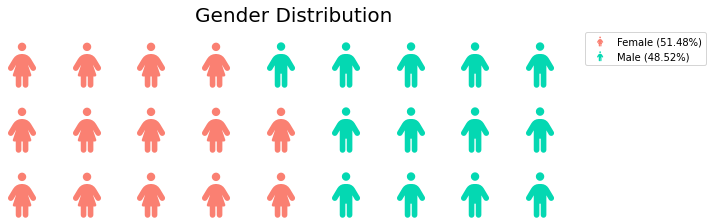

In [8]:
#draw histogram of age distribution
fig = plt.figure(
    FigureClass=pyw.Waffle, 
    rows=3, 
    columns = 9,
    values=gender_df['percent'], 
    colors=("#FA8072", "#04D8B2"),
    title={'label': 'Gender Distribution', 'loc': 'center','size':20},
    labels=[f"{k} ({'{:.2f}'.format(v)}%)" for k, v in zip(gender_df.index, gender_df.percent)],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons=['female','male'], 
    icon_size=45, 
    icon_legend=True,
    figsize=(10, 8)
)

#displaying the waffle chart
plt.show()

## Our targeted customers have a almost half-half gender distribution with females slightly more than males.

### 1.2.3 Region

In [9]:
#count region
counts = df_dmg['region - Region'].value_counts()
region_df = pd.DataFrame(counts)
region_df['percent'] = (region_df['region - Region'] /region_df['region - Region'].sum())

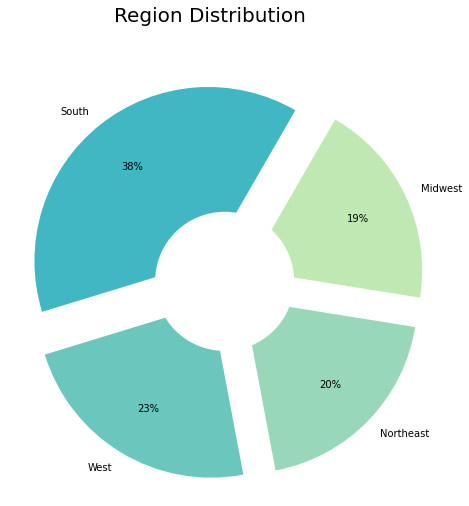

In [10]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Region Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15)
labels = ['South', 'West', 'Northeast', 'Midwest']
sizes = region_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# Adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

## Most of our target customers live in the South, while an even distribution of our target customers live in the West, Northwest, and Midwest.

### 1.2.4 Employment status

In [11]:
#count status
counts = df_dmg['QNEW3 - What is your employment status?'].value_counts()
status_df = pd.DataFrame(counts)
status_df['percent'] = (status_df['QNEW3 - What is your employment status?'] /status_df['QNEW3 - What is your employment status?'].sum())
status_df['percent']

Employed full-time or part-time    0.396662
Retired                            0.322208
Student                            0.116175
Unemployed                         0.099487
Self-employed                      0.065469
Name: percent, dtype: float64

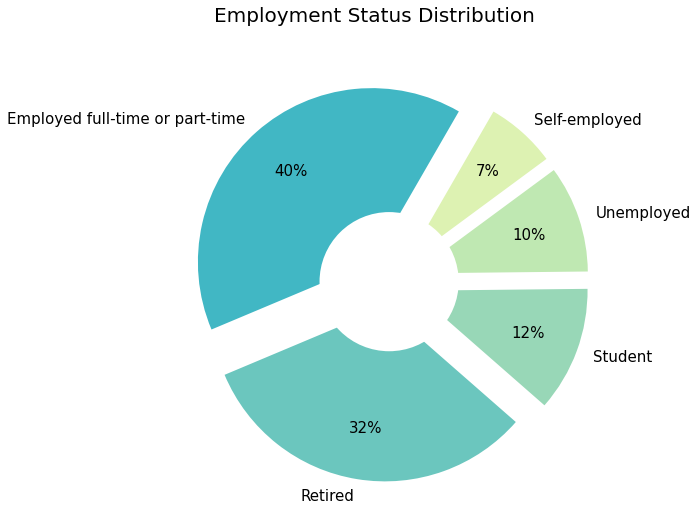

In [12]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Employment Status Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15, 0.15)
labels = ['Employed full-time or part-time', 'Retired', 'Student','Unemployed','Self-employed']
sizes = status_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# Adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

## Our targeted customers are mainly employed or retired.

### 1.2.5 Annual Household Income

In [13]:
#count status
counts = df_dmg['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].value_counts()
income_df = pd.DataFrame(counts)
income_df['percent'] = (income_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'] /income_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].sum())
income_df['percent']

$50,000 to $99,999      0.366496
$30,000 to $49,999      0.208601
Less than $29,999       0.195764
$100,000 to $299,999    0.165597
Do not know             0.053273
More than $300,000      0.010270
Name: percent, dtype: float64

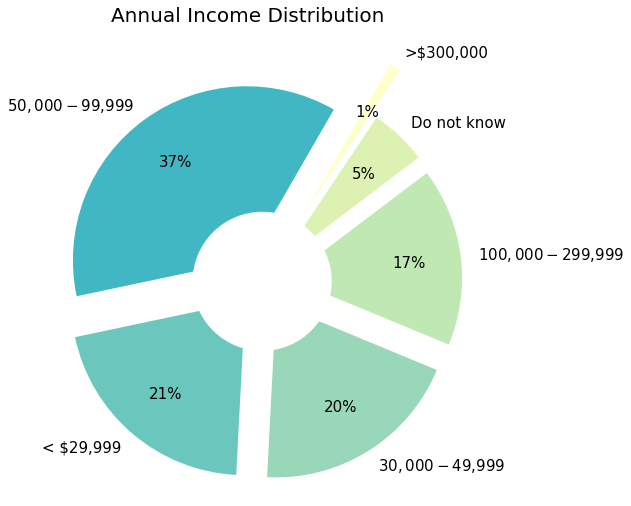

In [14]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Annual Income Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15, 0.15, 0.45)
labels = ['$50,000 - $99,999', '< $29,999', '$30,000 - $49,999','$100,000 - $299,999','Do not know','>$300,000']
sizes = income_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2','#FFFFCB']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# Adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

## Most of our targeted customers have an annual household income below 100 k dollars

### 1.2.6 Ethnicity

In [15]:
#count ethnicity
counts = df_dmg['Q5 - Which category best describes your ethnicity?'].value_counts()
eth_df = pd.DataFrame(counts)
eth_df['percent'] = (eth_df['Q5 - Which category best describes your ethnicity?'] /eth_df['Q5 - Which category best describes your ethnicity?'].sum())
eth_df['percent']

White or Caucasian (Non-Hispanic)                                                   0.708601
African American                                                                    0.120668
Hispanic                                                                            0.098203
Multiracial                                                                         0.020539
East Asian or Southeast Asian                                                       0.019255
Caribbean                                                                           0.009628
Something else not listed here                                                      0.008986
South Asian (India, Pakistan, Sri Lanka)                                            0.006418
Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)    0.005135
Middle Eastern                                                                      0.002567
Name: percent, dtype: float64

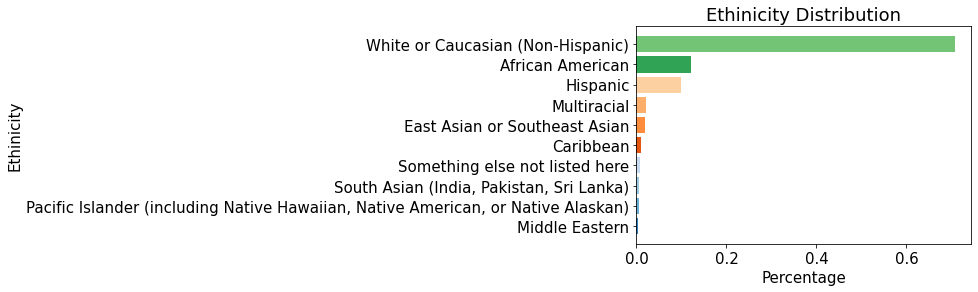

In [16]:
# Sort the dataframe descendingly
eth_df.sort_values(by='percent', ascending=True, inplace=True)

# Create a color palette
palette = sns.color_palette("tab20c", len(eth_df['percent']))

# Create a horizontal bar plot
plt.barh(eth_df.index, eth_df['percent'], color=palette)

# Add labels and title
plt.title('Ethinicity Distribution')
plt.xlabel('Percentage')
plt.ylabel('Ethinicity')

# Show plot
plt.show()

## Our targeted customers mainly hold an ethinicity of White or Caucasion.

## 1.3 Check Missing values

In [17]:
internet_df = internet_df.replace("#NULL!", None)

In [18]:
missing_count = internet_df.isna().sum()
missing_df = (pd.concat([missing_count.rename('Missing count'),
                     missing_count.div(len(internet_df))
                          .rename('Missing ratio')],axis = 1)
             .loc[missing_count.ne(0)])

#color the background of cells in a dataframe depending on the value of the data in each column 
missing_df.style.background_gradient(cmap="cool")

,Missing count,Missing ratio
QNEW2 - How old are the children in your home?-0-4 years,978,0.627728
QNEW2 - How old are the children in your home?-5-9 years,978,0.627728
QNEW2 - How old are the children in your home?-10-13 years,978,0.627728
QNEW2 - How old are the children in your home?-14-18 years,978,0.627728
QNEW2 - How old are the children in your home?-19-25 years,978,0.627728
QNEW2 - How old are the children in your home?-26+ years,978,0.627728
QNEW2 - How old are the children in your home?-Don't Know,978,0.627728
"Q11r1 - Flat panel television - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. Th",948,0.608472
"Q11r2 - Digital video recorder (DVR) - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to ra",1433,0.919769
"Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selectio",1479,0.949294


### 1.3.1 We drop the columns with missing values > 60%.

In [19]:
internet_df = internet_df.drop(missing_df[missing_df['Missing ratio'] > 0.60].index, axis=1)

### 1.3.2 For the rest columns, we will clean the data based on the background information of each question group that current column belongs to

### The first column which is just a record number and does not contribute to the whole analysis,thus, we decided to drop it.

In [20]:
internet_df = internet_df.drop('record - Record number', axis=1)

In [21]:
missing_count1 = internet_df.isna().sum()
missing_df1 = (pd.concat([missing_count1.rename('Missing count'),
                     missing_count1.div(len(internet_df))
                          .rename('Missing ratio')],axis = 1)
             .loc[missing_count1.ne(0)])

#color the background of cells in a dataframe depending on the value of the data in each column 
missing_df1.style.background_gradient(cmap="cool")

,Missing count,Missing ratio
"Q11r10 - Laptop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. The fir",815,0.523107
"Q11r15 - Smartphone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in th",659,0.422978
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Photo/video,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Banking,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Fitness/health,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Food/drink,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Retail/shopping,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Navigation,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Social networks,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reading books,412,0.264442


### For question 11, now we only have options of "smartphone" and "laptop". We will replace None value with 4 since those are the people who do not think that "smartphone" and "laptop" are their first three choices.

In [22]:
internet_df.iloc[:, 51:53] = internet_df.iloc[:,51:53].fillna(value=4)

### For question 22, we have 412 missing values, which indicates that 412 people do not have smart phone. Then we will replace the None value with string "No Smart Phone".

In [23]:
internet_df.iloc[:, 65:102] = internet_df.iloc[:, 65:102].fillna(value=-999)

### For question 36, now we only have options of "Pay TV" and "Home Internet". We will replace None value with 4 since those are the people who do not think that "Pay TV" and "Home Internet" are their first three choices.

In [24]:
internet_df.iloc[:, 114:116] = internet_df.iloc[:,114:116].fillna(value=4)

### For question 37, now we only have options of "Watching television (video content on any device)" and "Using the Internet for social or personal interests". We will replace None value with 4 since those are the people who do not think that "Watching television (video content on any device" and "Using the Internet for social or personal interests" are their first three choices.

In [25]:
internet_df.iloc[:, 117:119] = internet_df.iloc[:,117:119].fillna(value=4)

### Since most colums here are categorical only data, even though some categories are seldom chosen, it still represents a portion that shapes the distribution of the column data. We believe replacing or droping outliers in this case will cause data bias issue. Thus, no other specific outliers are handled here.

## 1.4 Summary statistics

### 1.4.1 For easier handling, we divide the columns into 2 groups: data frame with only numeric values; data frame with only categorical values

In [26]:
df_num_age = pd.DataFrame(internet_df.iloc[:, 0])
df_num_age

,"Q1r1 - To begin, what is your age?"
1,26.0
3,25.0
4,28.0
9,16.0
10,32.0
...,...
2126,14.0
2127,70.0
2128,18.0
2129,79.0


In [27]:
df_num_time = internet_df.iloc[:, 53:65]
df_num_time

,"Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q17r1 - Smartphone - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r2 - Tablet - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r3 - Laptop/Desktop - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r4 - Television - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?"
1,40.0,30.0,30.0,0.0,40.0,30.0,30.0,0.0,30.0,30.0,40.0,0.0
3,10.0,25.0,15.0,50.0,10.0,15.0,0.0,75.0,0.0,25.0,0.0,75.0
4,10.0,0.0,10.0,80.0,5.0,0.0,0.0,95.0,10.0,0.0,0.0,90.0
9,5.0,80.0,0.0,15.0,0.0,0.0,0.0,100.0,0.0,80.0,0.0,20.0
10,30.0,0.0,70.0,0.0,40.0,0.0,60.0,0.0,20.0,0.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2126,0.0,25.0,55.0,20.0,0.0,30.0,40.0,30.0,0.0,30.0,40.0,30.0
2127,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2128,0.0,0.0,0.0,0.0,0.0,10.0,0.0,90.0,0.0,20.0,0.0,80.0
2129,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0


In [28]:
# Concat two parts of the same data frame
df_num = pd.concat([df_num_age,df_num_time], axis = 1)
df_num[:] = df_num[:].astype('float64') 

In [29]:
# get the columns from df_column_drop that are not in df_column_drop_num
cat_cols = [col for col in internet_df.columns if col not in df_num.columns]

# create a new data frame with only columns from the whole data frame that are not in numerical data frame
df_cat = internet_df[cat_cols]
df_cat # This is the dataframe for categorical columns

,Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray dis

### 1.4.2 Summary statistics for numerical data

In [30]:
# statistics of numerical data
df_num.astype(float).describe()

,"Q1r1 - To begin, what is your age?","Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q17r1 - Smartphone - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r2 - Tablet - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r3 - Laptop/Desktop - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r4 - Television - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?"
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,47.308087,9.435815,7.626444,23.329910,47.284339,7.505135,4.681643,16.077022,40.221438,9.088575,7.664313,22.520539,51.291399
std,21.493291,19.208739,17.758325,33.136552,43.848890,18.518152,14.174210,30.416809,45.564909,19.836742,19.240149,33.813771,44.747401
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,0.000000,0.000000,0.500000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
75%,69.000000,10.000000,5.000000,40.000000,100.000000,0.000000,0.000000,20.000000,100.000000,10.000000,0.000000,35.000000,100.000000
max,91.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### 1.4.3 statistics of categorical data

In [31]:
# statistics of categorical data
df_cat.astype(str).describe()

,Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray dis

## 1.5 Univariate analysis

In [32]:
# plotting histogram + KDE and boxplot for specified column
def plot_distribution(x,c, title=None):
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    fig.suptitle(title, fontsize=15)
    plt.tight_layout(pad=3.0)
    plt.show()

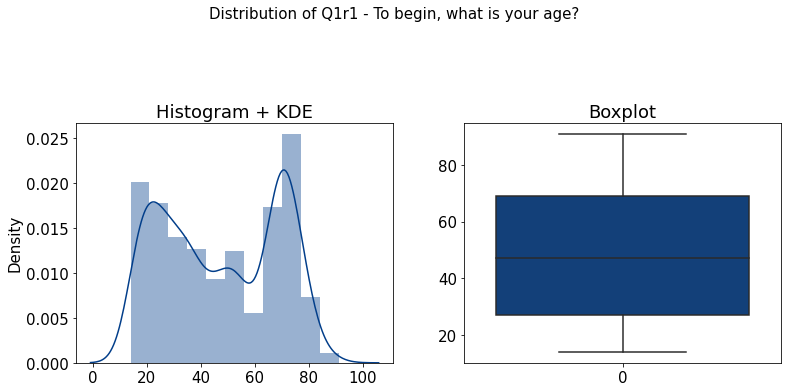

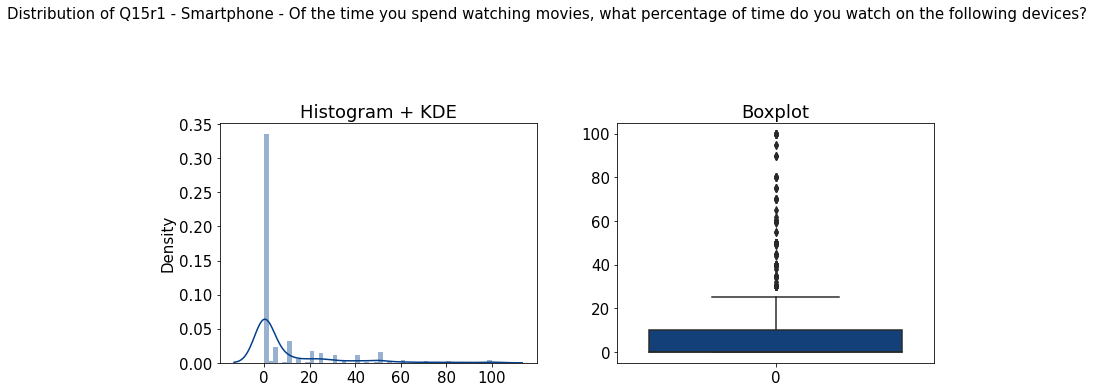

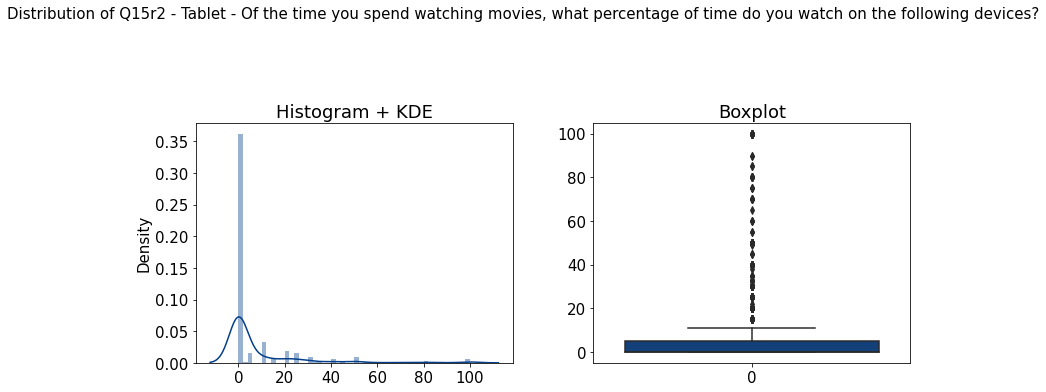

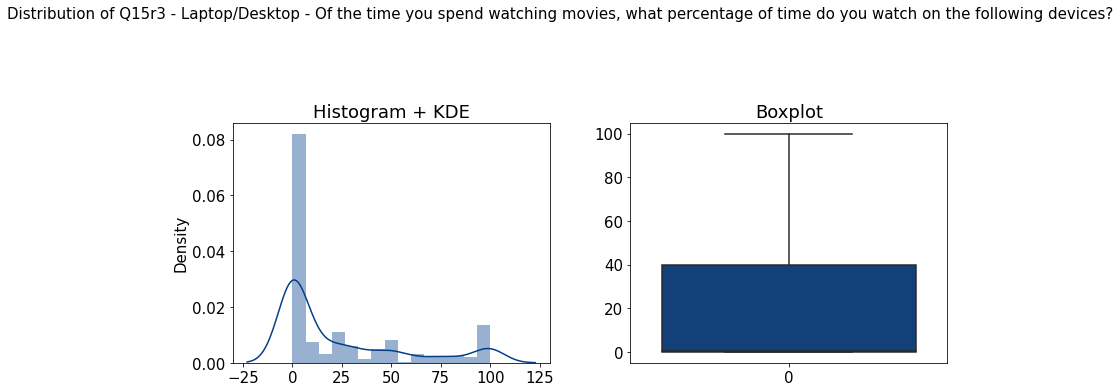

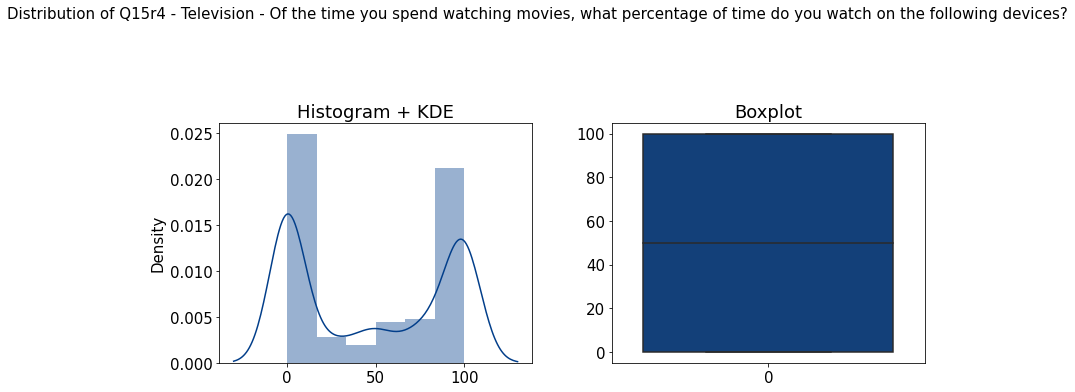

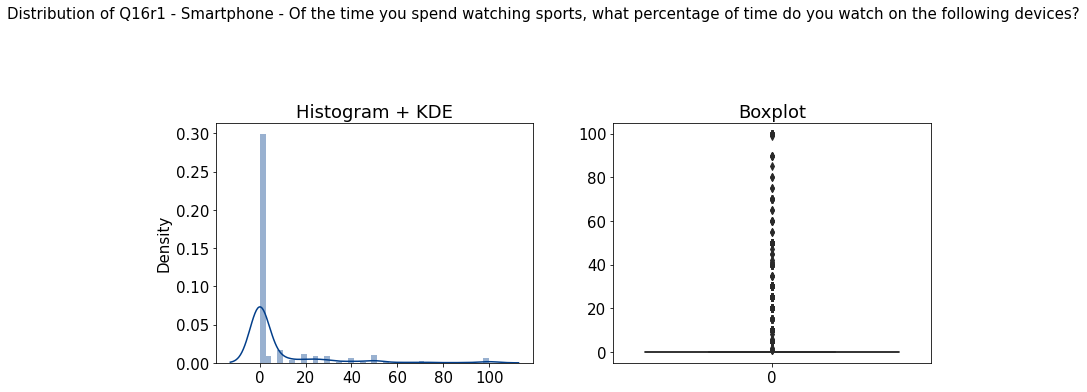

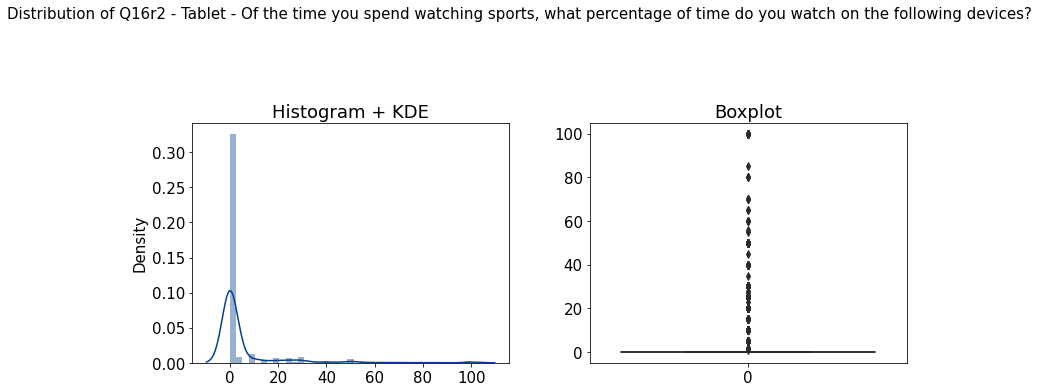

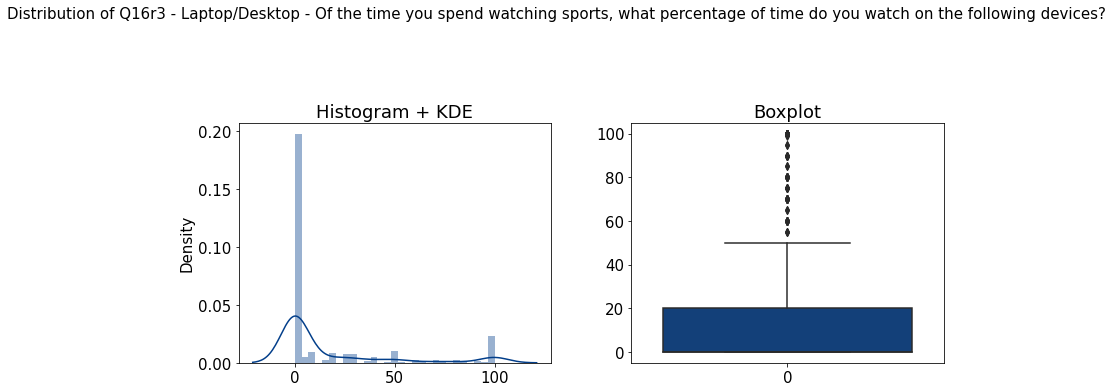

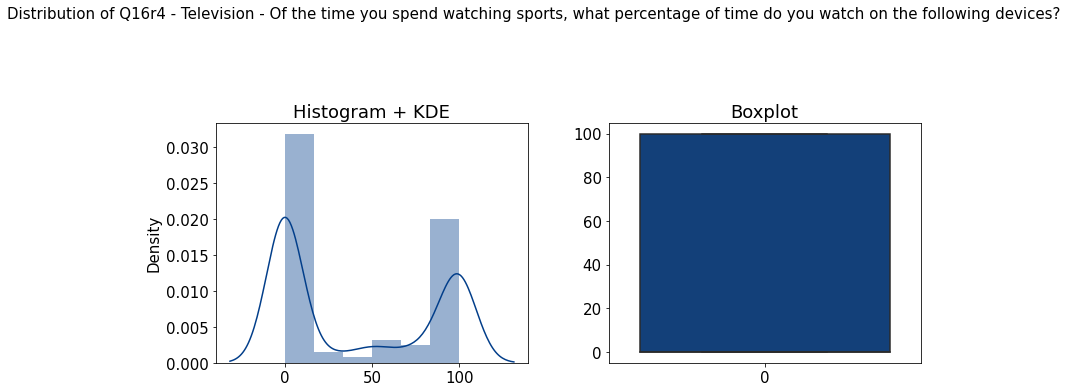

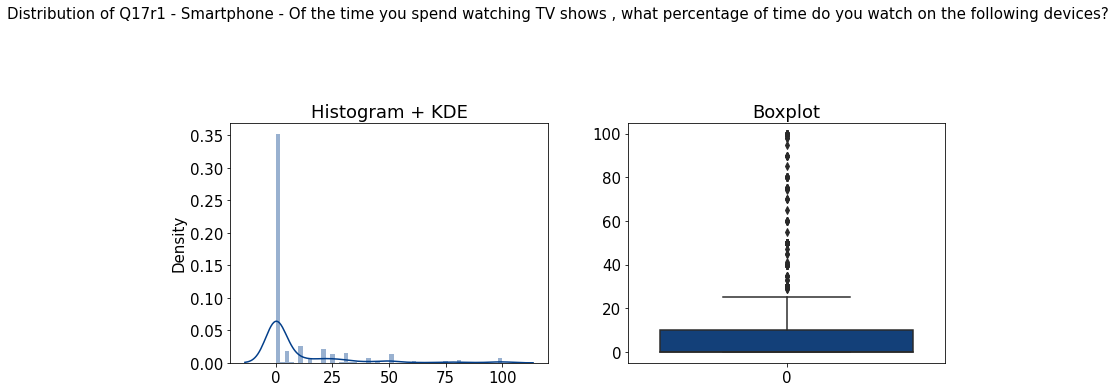

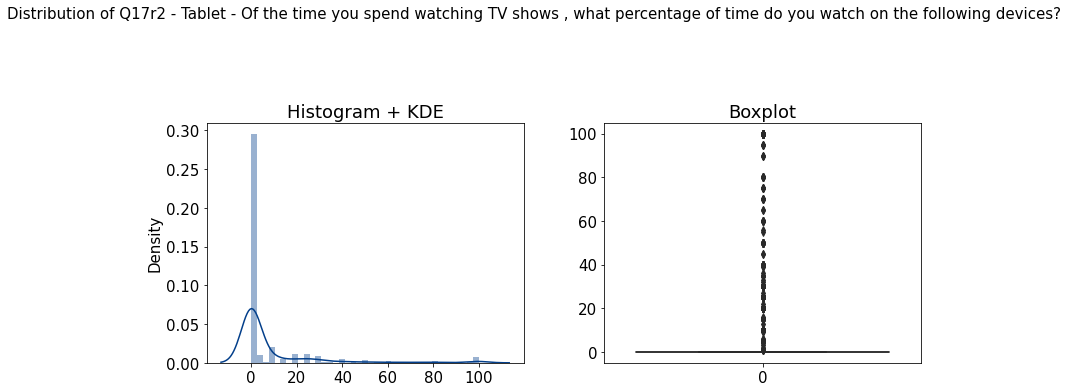

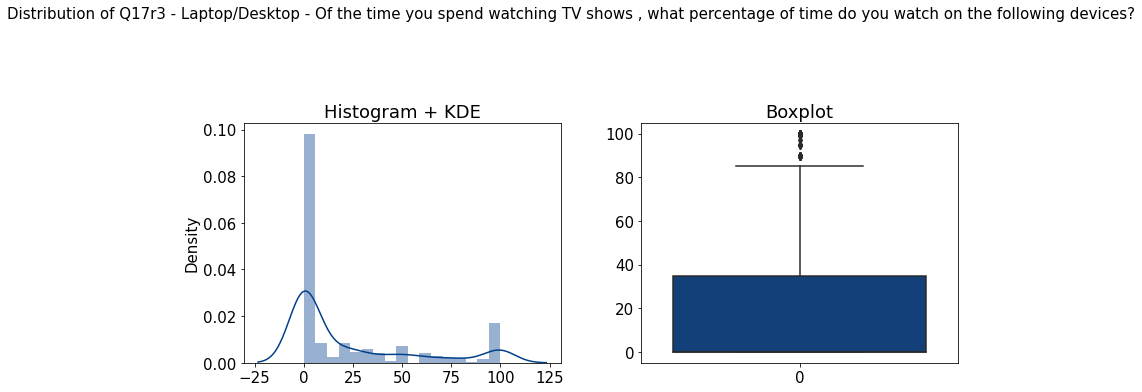

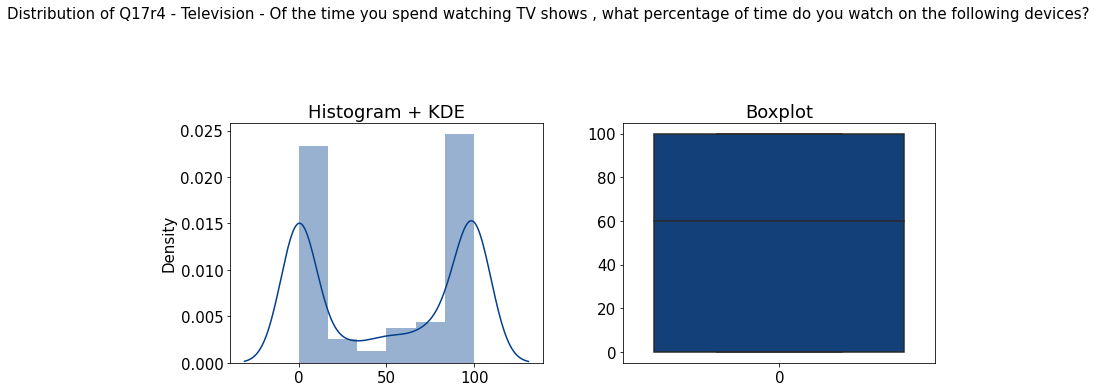

In [33]:
df_num = df_num.reset_index(drop=True)
for name in list(df_num.columns):
    plot_distribution(df_num[name],custom_colors[0], title="Distribution of " + name)

### Then let's do the univariate analysis for categorical columns.

Boxplot and histogram for age - you are...


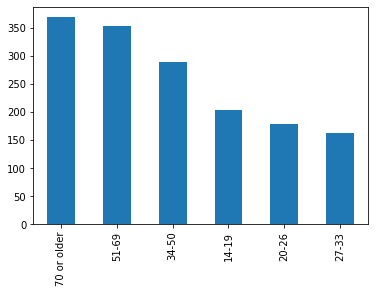

Boxplot and histogram for Q2 - In which state do you currently reside?


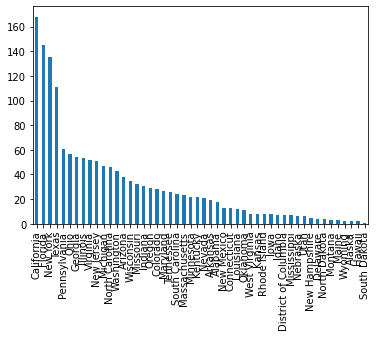

Boxplot and histogram for region - Region


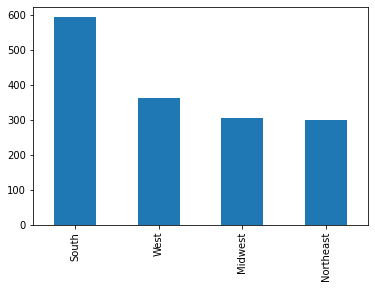

Boxplot and histogram for QNEW3 - What is your employment status?


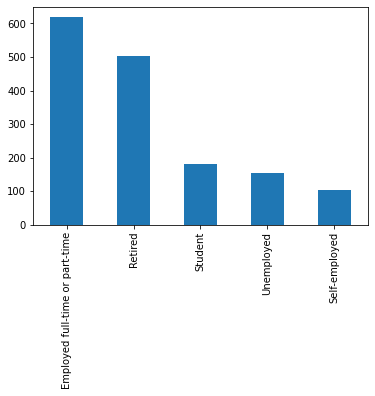

Boxplot and histogram for Q5 - Which category best describes your ethnicity?


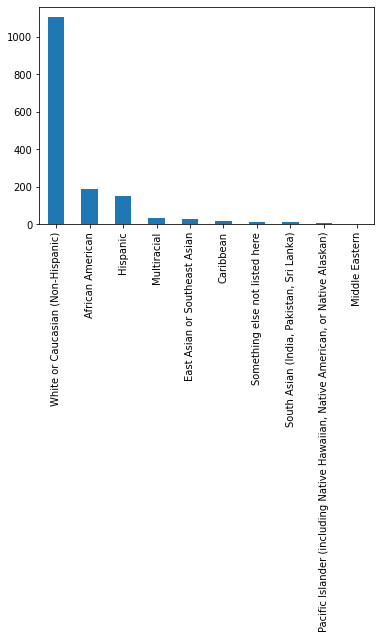

Boxplot and histogram for QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?


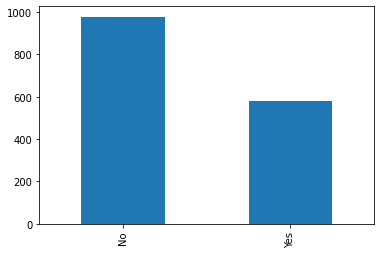

Boxplot and histogram for Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.


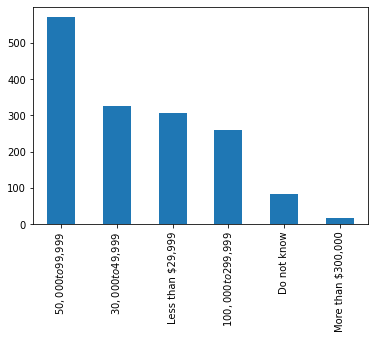

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television


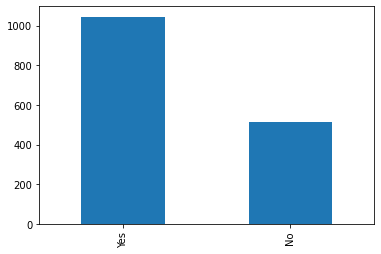

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)


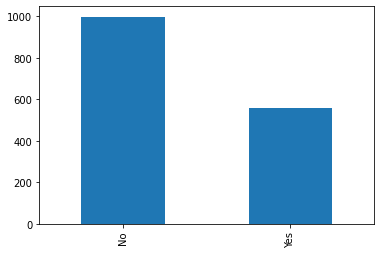

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box


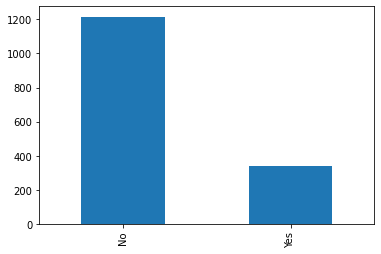

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob


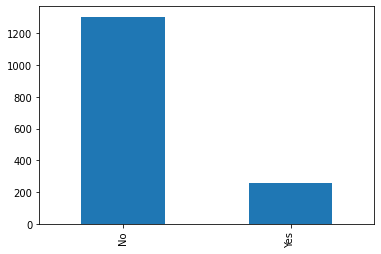

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)


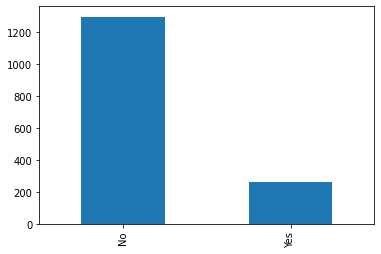

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player


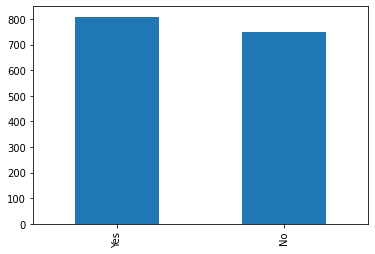

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console


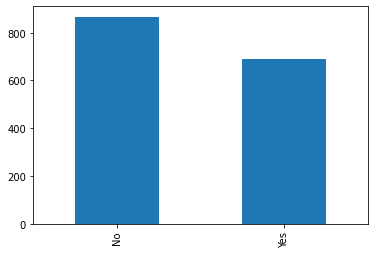

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player


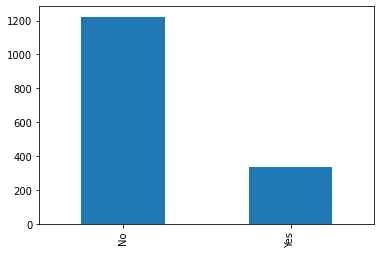

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage


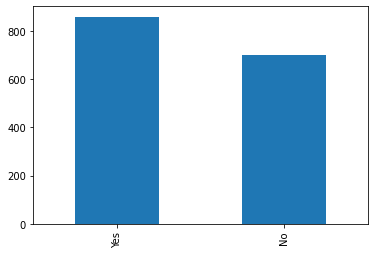

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer


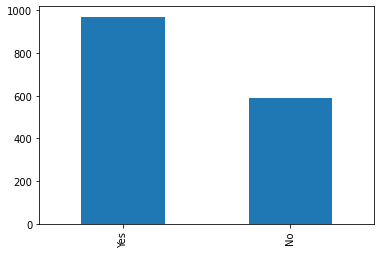

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer


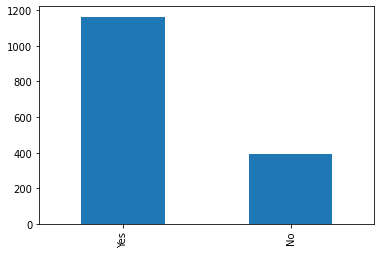

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet


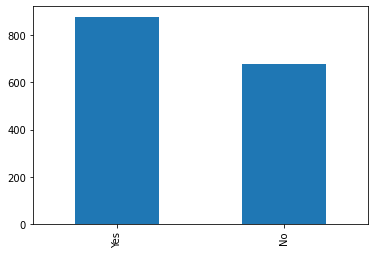

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader


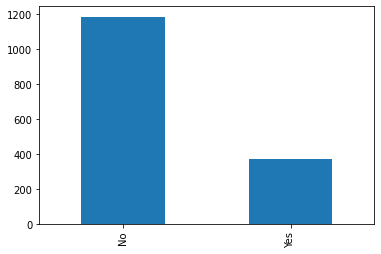

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone


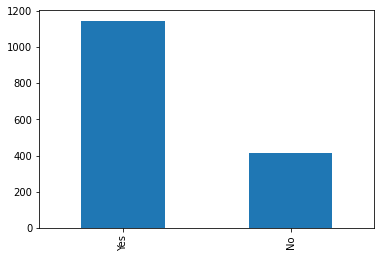

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone)


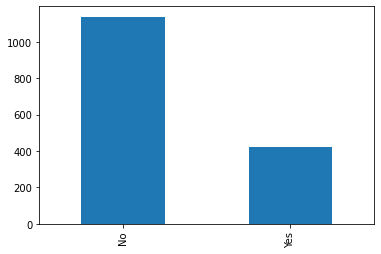

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch


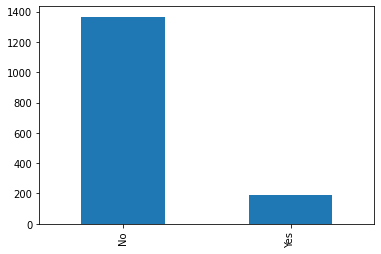

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band


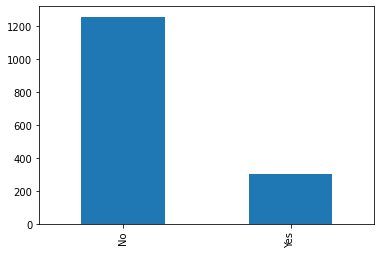

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset


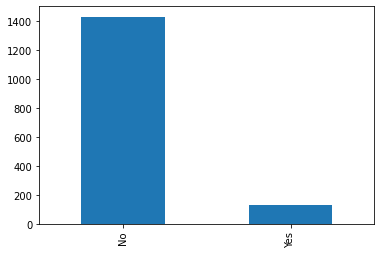

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Drone


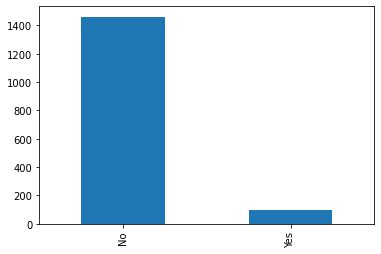

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above


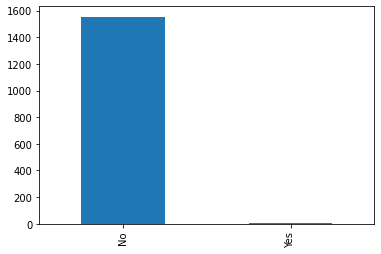

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know


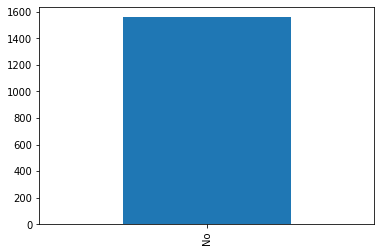

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television


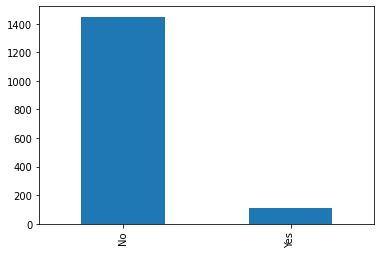

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)


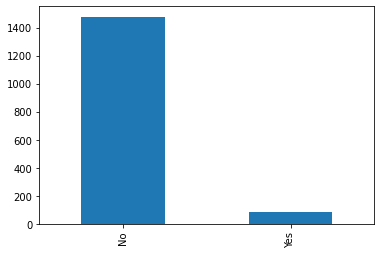

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box


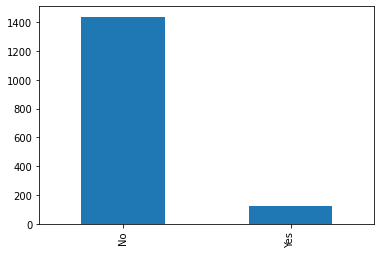

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob


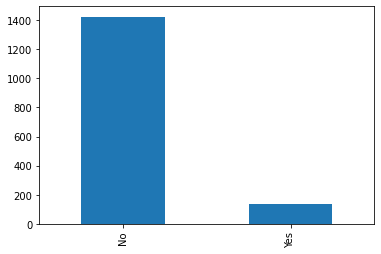

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)


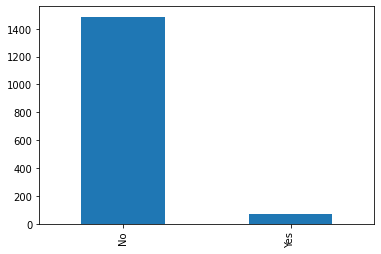

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player


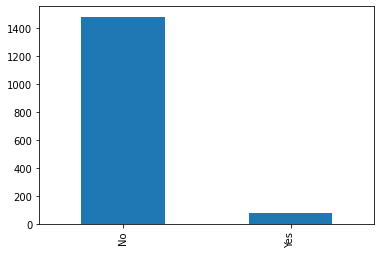

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console


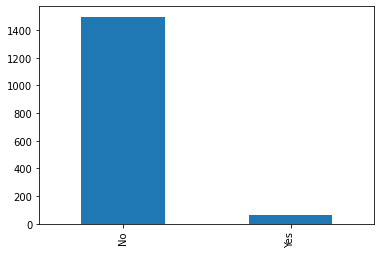

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player


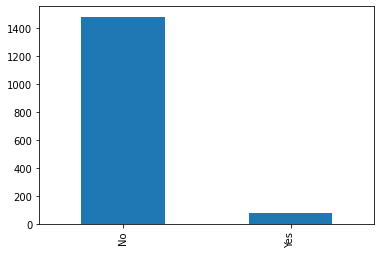

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage


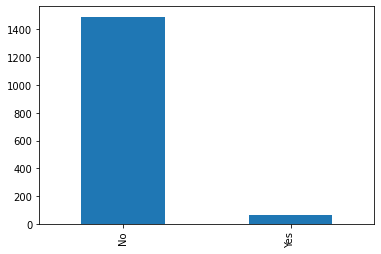

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer


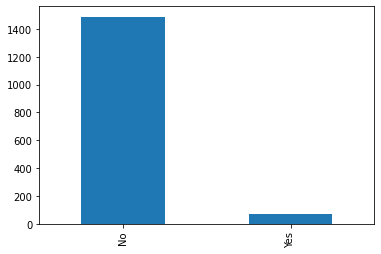

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer


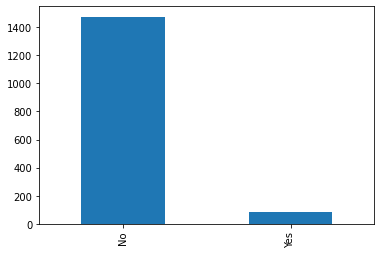

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet


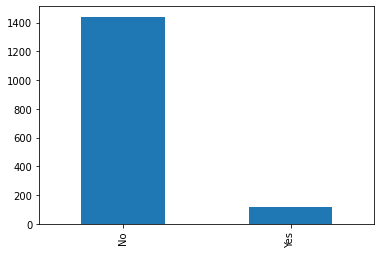

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader


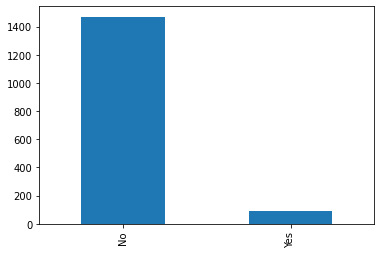

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone


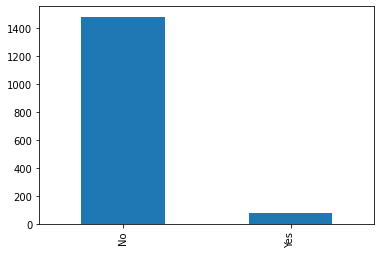

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone (not a smartphone)


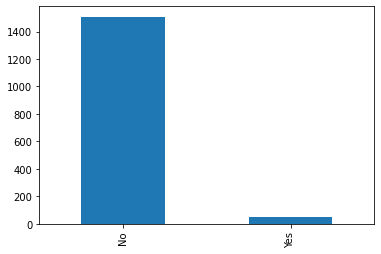

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch


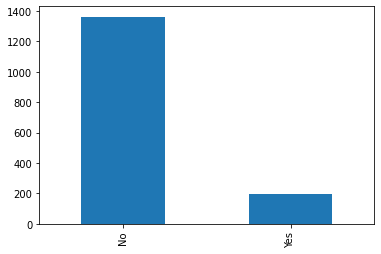

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band


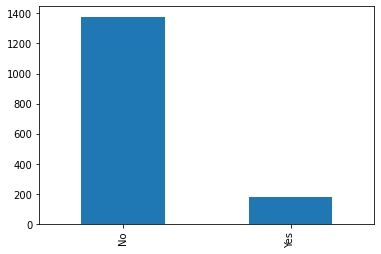

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset


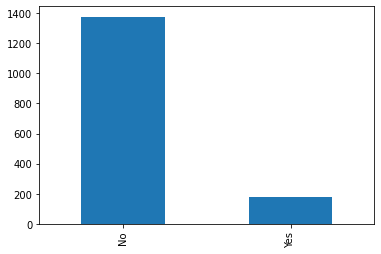

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone


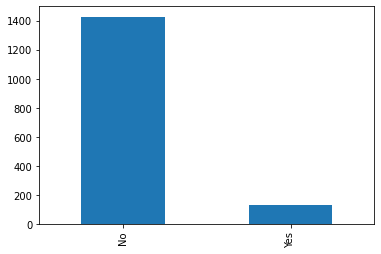

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above


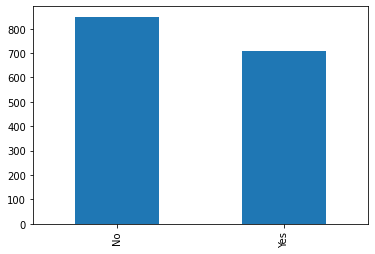

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know


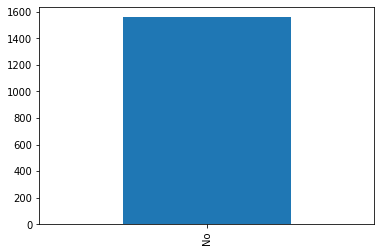

Boxplot and histogram for Q11r10 - Laptop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to rank.  The fir


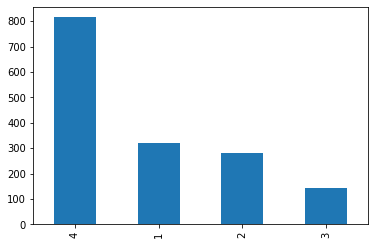

Boxplot and histogram for Q11r15 - Smartphone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in th


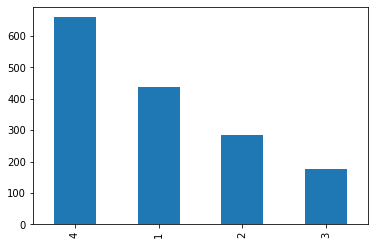

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Photo/video


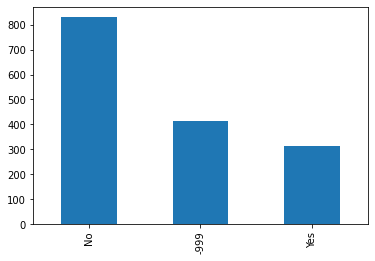

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Banking


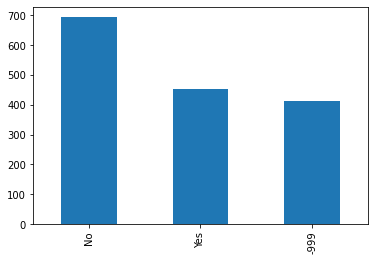

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Fitness/health


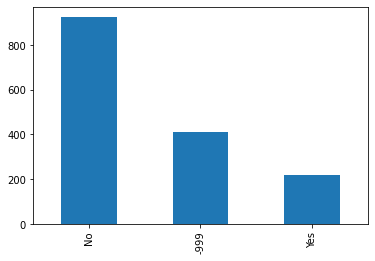

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Food/drink


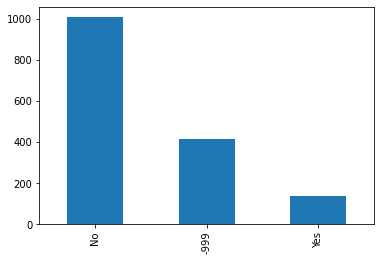

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Retail/shopping


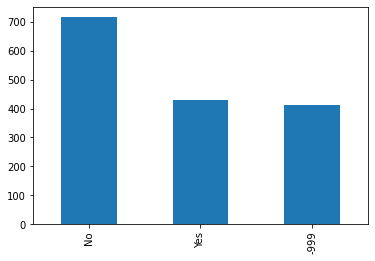

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Navigation


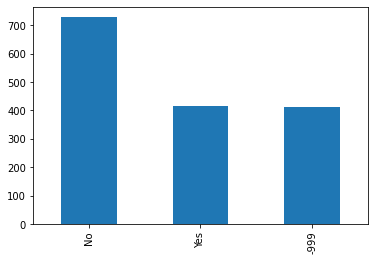

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Social networks


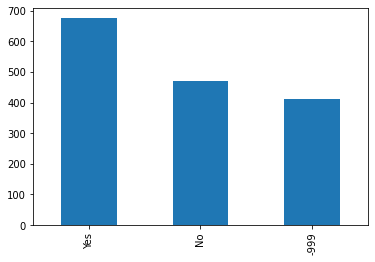

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reading books


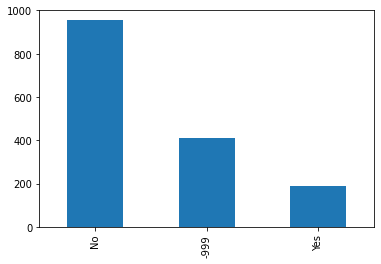

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Streaming music


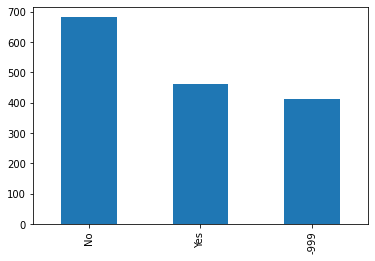

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Streaming video


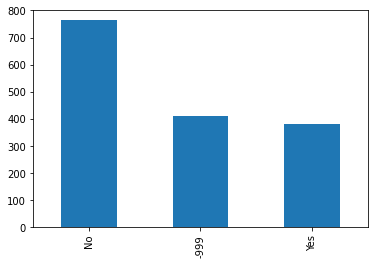

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reviews/guides


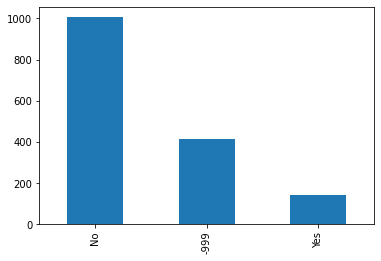

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-News consolidator


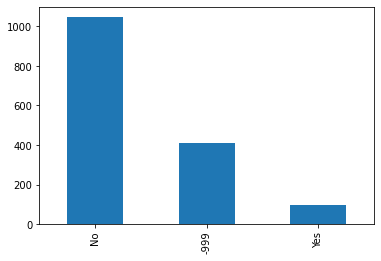

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Newspaper/news broadcaster


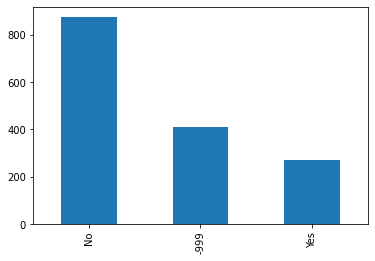

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Magazines


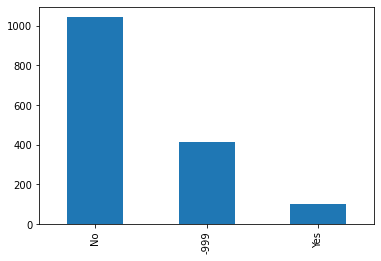

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Diagnostic/utilities


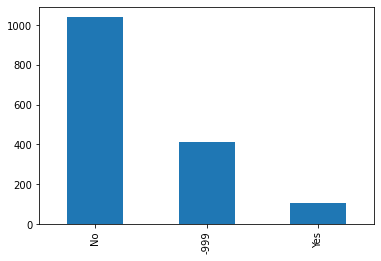

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-QR Reader


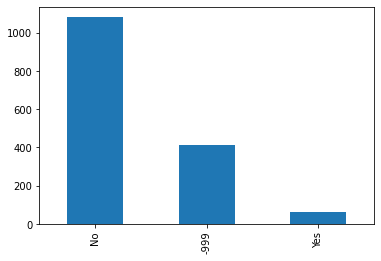

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Travel


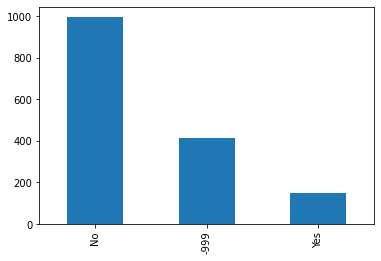

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Transportation


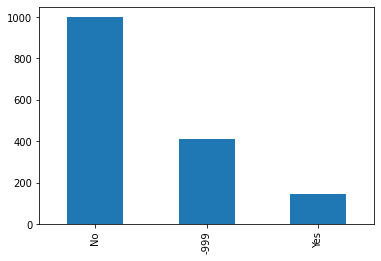

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Location


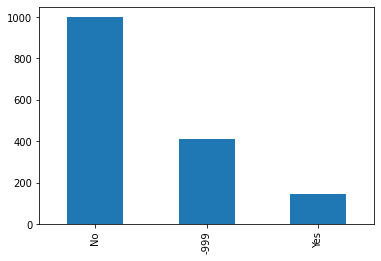

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Language


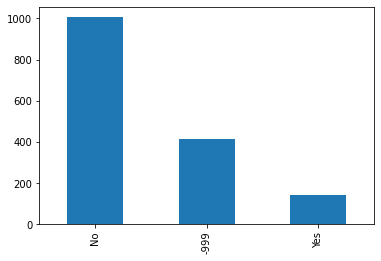

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Movie


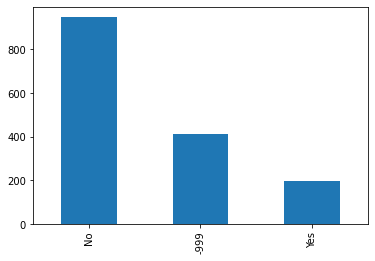

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Business


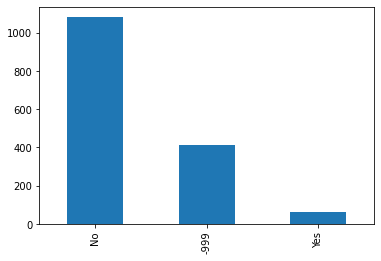

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Games


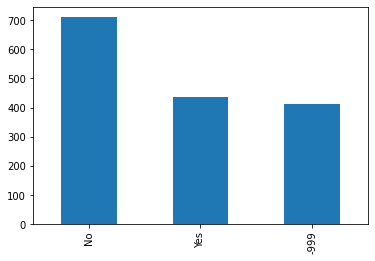

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Productivity


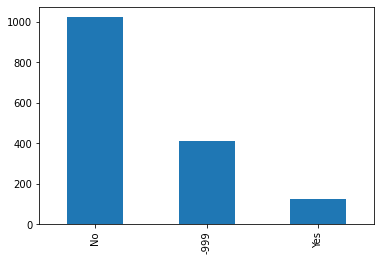

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Sports


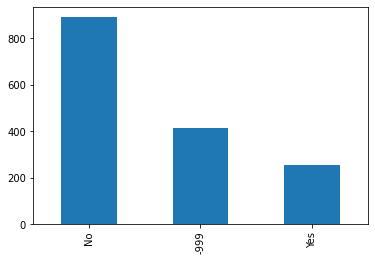

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Weather


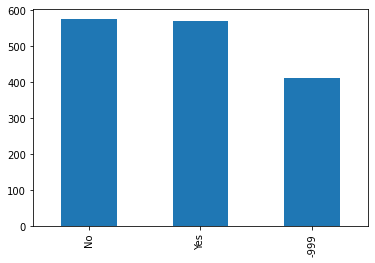

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Browser


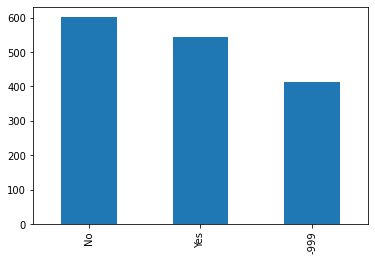

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-VOIP


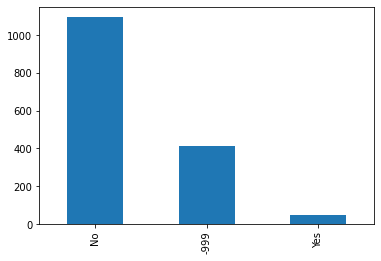

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Dating


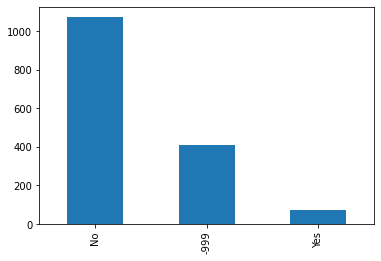

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Messaging


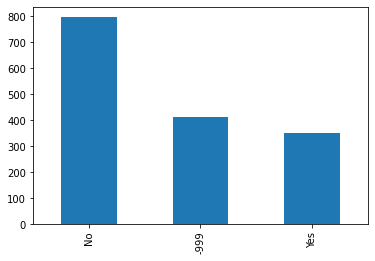

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Mobile payment


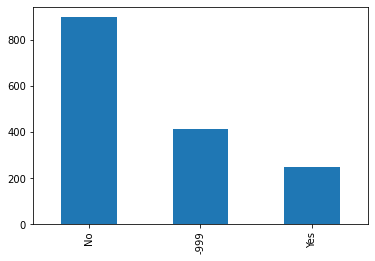

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Education


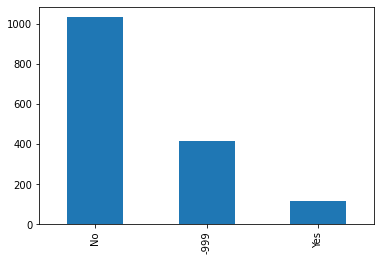

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Tickets


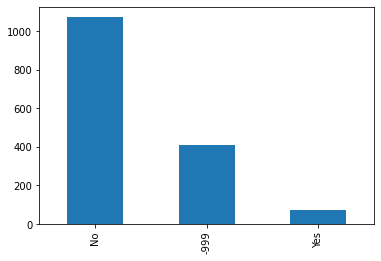

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reservations


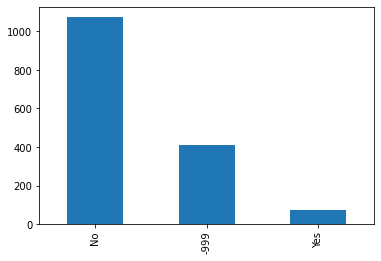

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Special interest/Hobby apps


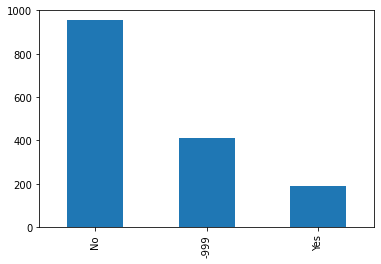

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-I do not use any of the above types of apps on a frequent (everyday/weekly) basis.


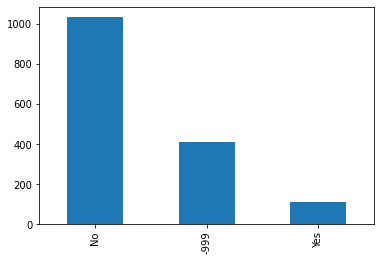

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Don't Know


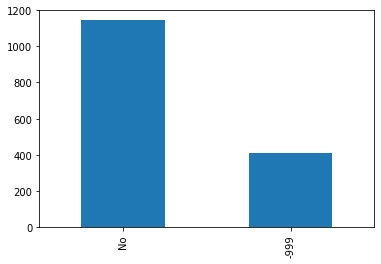

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Pay TV (traditional cable and/or satellite bundle)


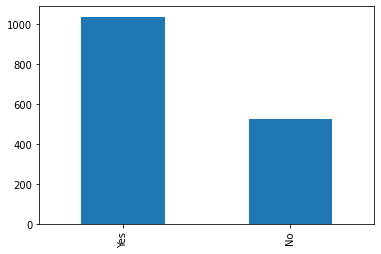

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Home internet


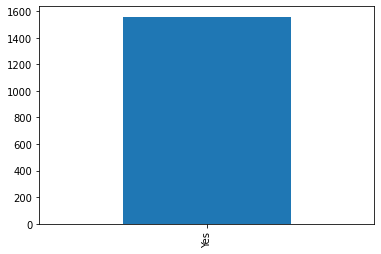

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Landline telephone


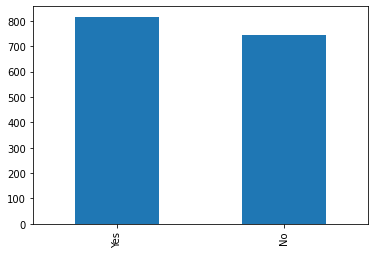

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Mobile voice (smartphone or basic mobile phone calling plan)


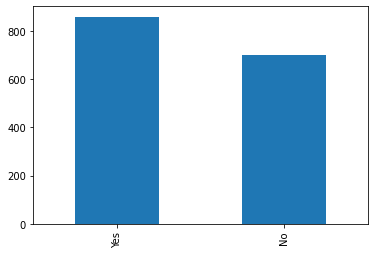

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Mobile data plan


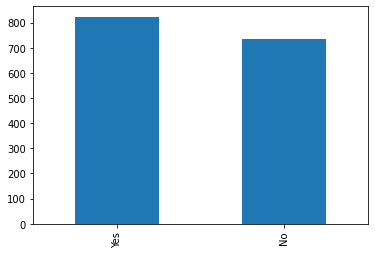

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Streaming video service


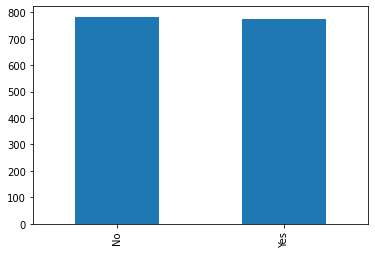

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Streaming music service


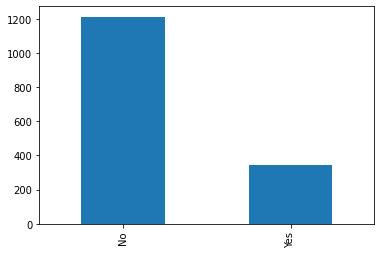

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Gaming


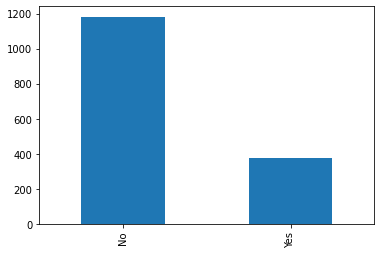

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)


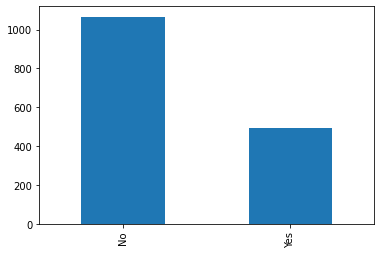

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Magazine (print or digital)


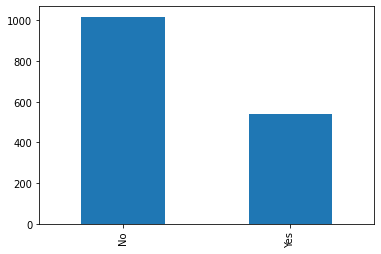

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-None of the above


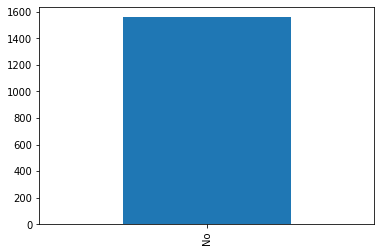

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Don't Know


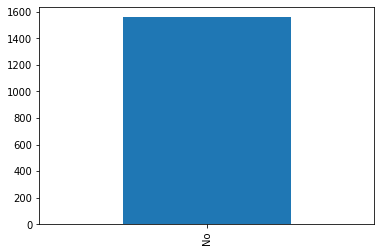

Boxplot and histogram for Q36r1 - Pay TV (traditional cable and/or satellite bundle) - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking


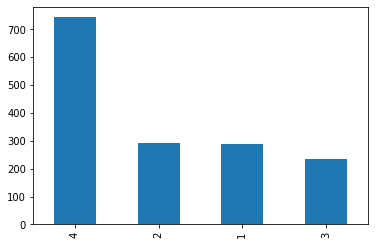

Boxplot and histogram for Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to r


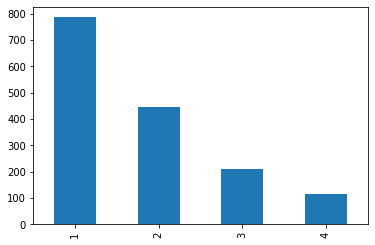

Boxplot and histogram for Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?


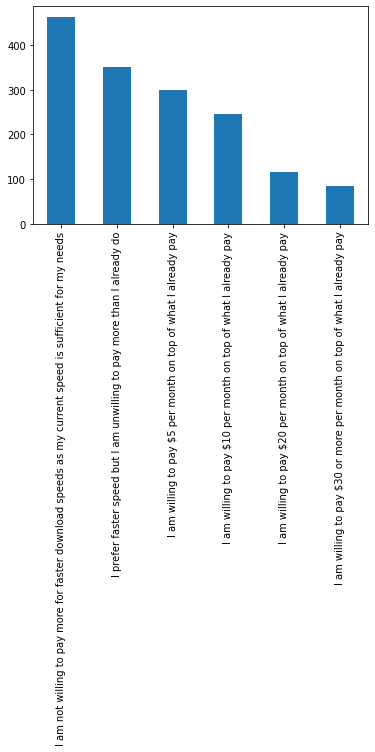

Boxplot and histogram for Q37r3 - Watching television (video content on any device) - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selec


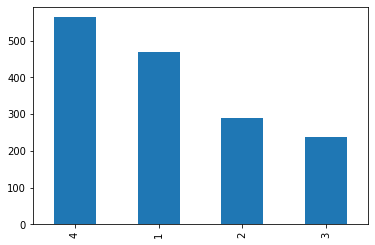

Boxplot and histogram for Q37r10 - Using the Internet for social or personal interests - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your se


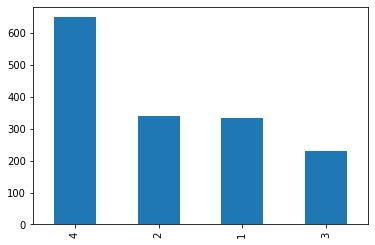

Boxplot and histogram for QNEW19r1 - Rent a physical DVD/Blu-ray - Thinking about how you watch movies, how frequently do you do each of the following?


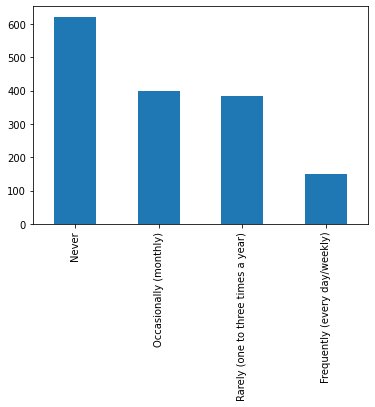

Boxplot and histogram for QNEW19r2 - Purchase a physical DVD/Blu-ray - Thinking about how you watch movies, how frequently do you do each of the following?


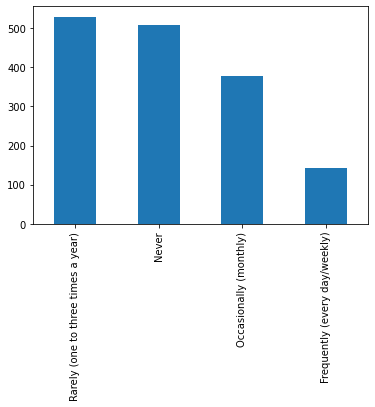

Boxplot and histogram for QNEW19r3 - Purchase digital video entertainment to download onto your device via online service - Thinking about how you watch movies, how frequently do you do each of the following?


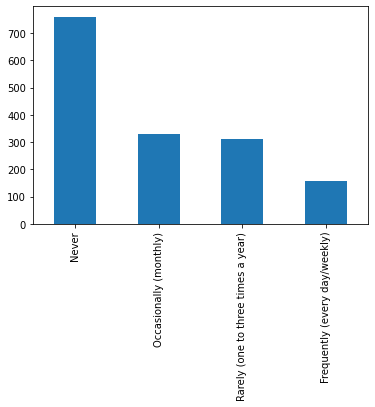

Boxplot and histogram for QNEW19r4 - Rent digital video entertainment where a digital file is downloaded to your device - Thinking about how you watch movies, how frequently do you do each of the following?


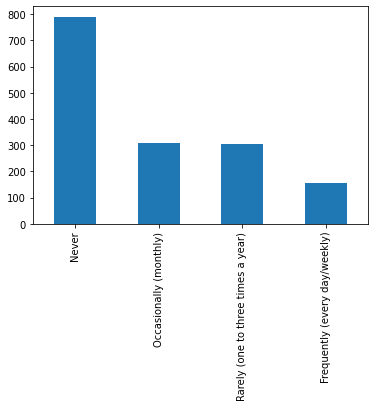

Boxplot and histogram for QNEW19r5 - Watch digital video entertainment via an online streaming service - Thinking about how you watch movies, how frequently do you do each of the following?


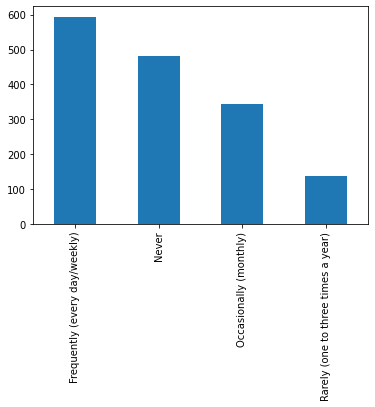

Boxplot and histogram for QNEW19r6 - Purchase/rent a video via your television service provider's On-Demand or Pay-Per-View service (i.e., via a set-top-box) - Thinking about how you watch movies, how frequently do you do each of the following?


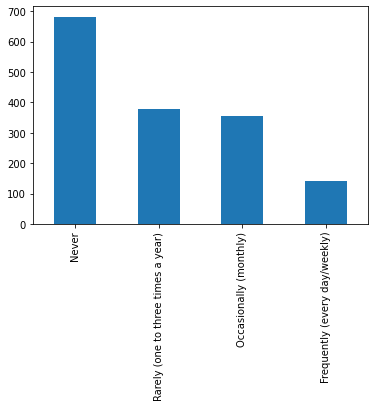

Boxplot and histogram for QNEW20r1 - Rent a physical DVD/Blu-ray - Thinking about how you watch television programming, how frequently do you do each of the following?


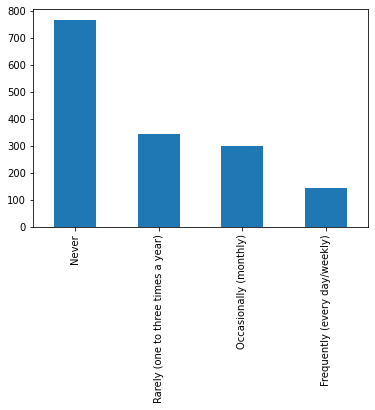

Boxplot and histogram for QNEW20r2 - Purchase a physical DVD/Blu-ray - Thinking about how you watch television programming, how frequently do you do each of the following?


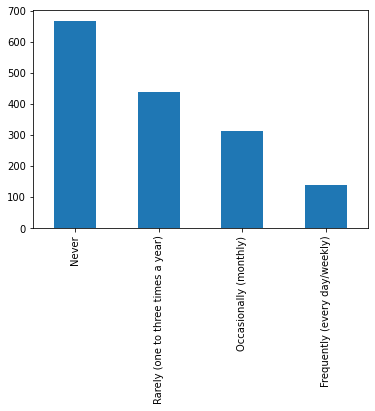

Boxplot and histogram for QNEW20r3 - Purchase digital video entertainment to download onto your device via online service - Thinking about how you watch television programming, how frequently do you do each of the following?


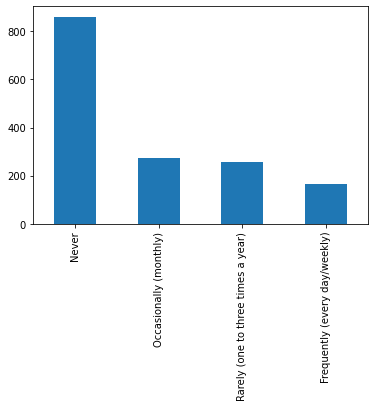

Boxplot and histogram for QNEW20r4 - Watch digital video entertainment via an online streaming service - Thinking about how you watch television programming, how frequently do you do each of the following?


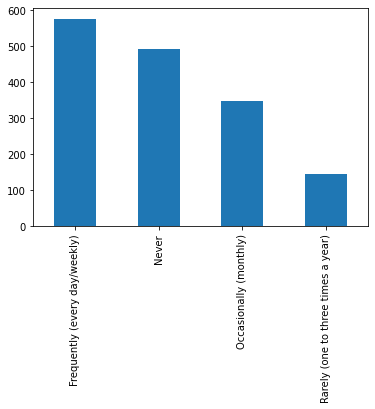

Boxplot and histogram for QNEW20r5 - Purchase/rent a video via your television service provider's On-Demand or Pay-Per-View service (i.e., via a set-top-box) - Thinking about how you watch television programming, how frequently do you do each of the following?


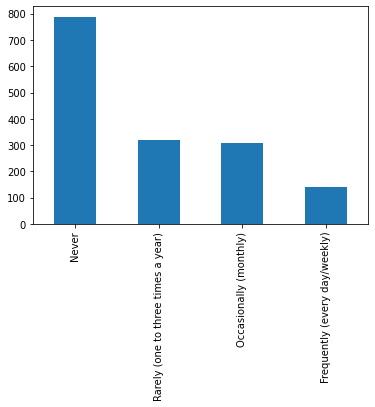

Boxplot and histogram for QNEW24 - Do you ever "binge-watch" television shows, meaning watching three or more episodes of a TV series in one sitting?


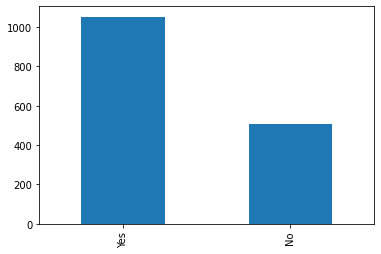

Boxplot and histogram for QNEW28 - How frequently do you use a friend or family member's (someone not living in your household) subscription login information  to watch digital content?


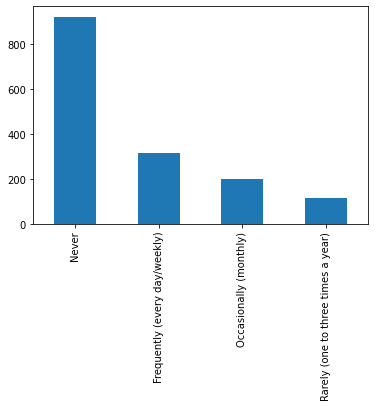

Boxplot and histogram for Q73r2 - Read for work and/or school - Which are things you typically do while watching your home television system?


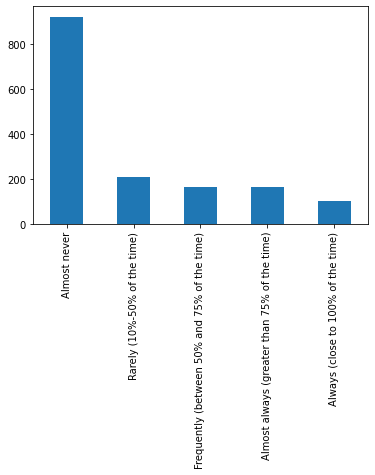

Boxplot and histogram for Q73r3 - Read for pleasure - Which are things you typically do while watching your home television system?


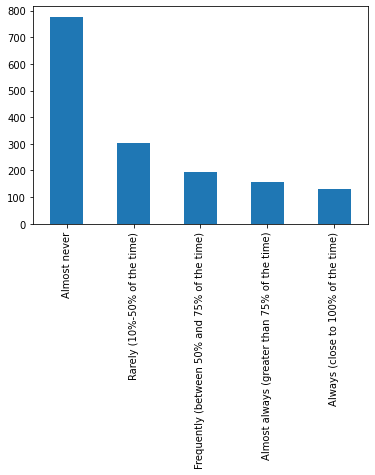

Boxplot and histogram for Q73r4 - Browse and surf the Web - Which are things you typically do while watching your home television system?


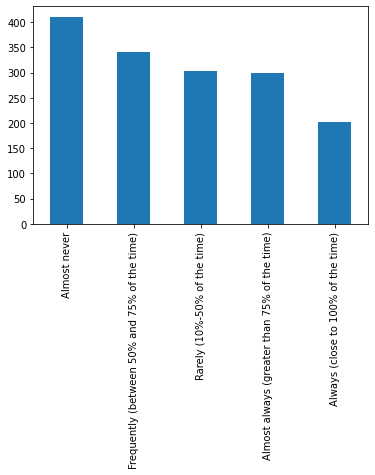

Boxplot and histogram for Q73r5 - Microblogging - Which are things you typically do while watching your home television system?


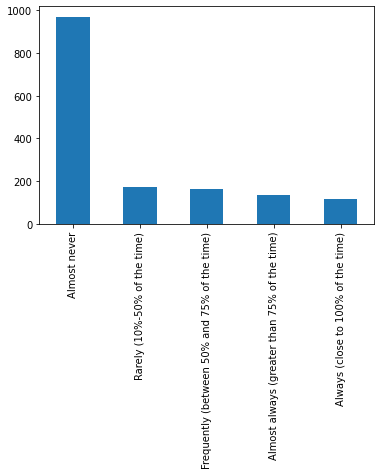

Boxplot and histogram for Q73r6 - Read email - Which are things you typically do while watching your home television system?


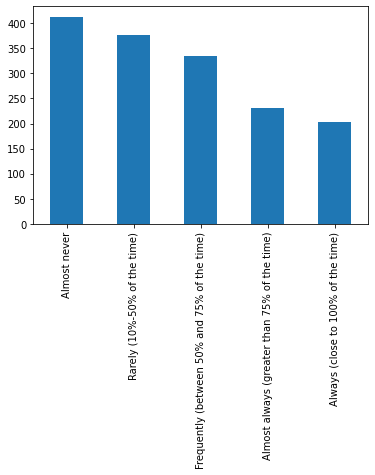

Boxplot and histogram for Q73r7 - Write email - Which are things you typically do while watching your home television system?


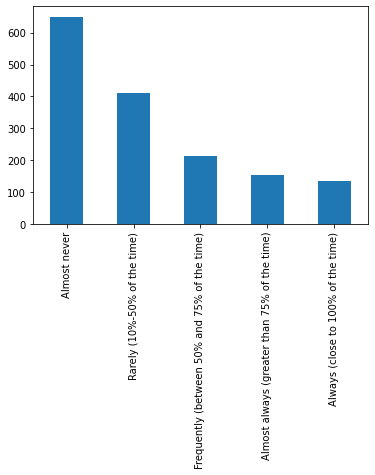

Boxplot and histogram for Q73r8 - Text message - Which are things you typically do while watching your home television system?


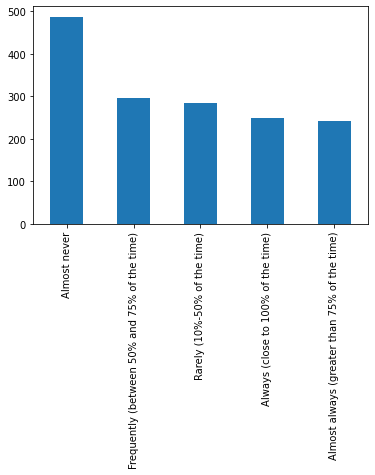

Boxplot and histogram for Q73r9 - Use a social network - Which are things you typically do while watching your home television system?


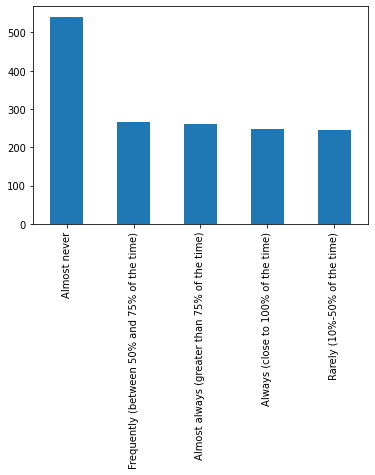

Boxplot and histogram for Q73r10 - Talk on the phone - Which are things you typically do while watching your home television system?


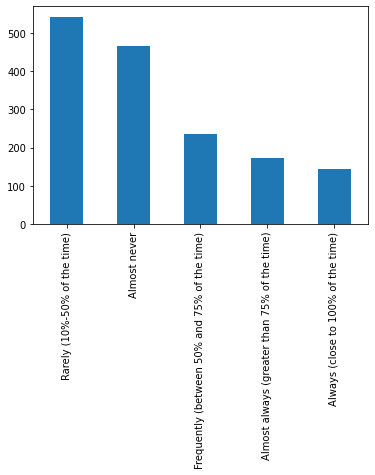

Boxplot and histogram for Q73r11 - Browse for products and services online - Which are things you typically do while watching your home television system?


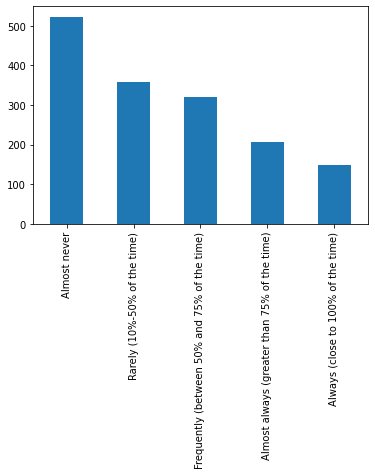

Boxplot and histogram for Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?


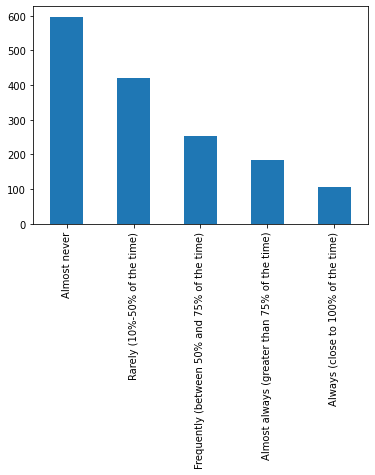

Boxplot and histogram for Q73r13 - Play video games - Which are things you typically do while watching your home television system?


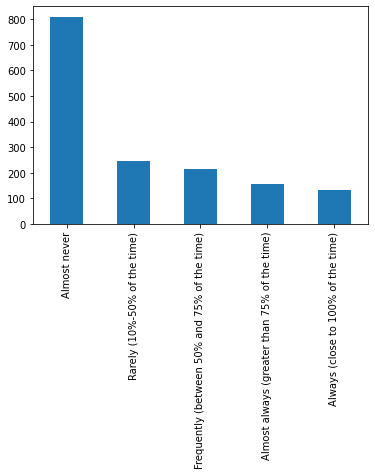

Boxplot and histogram for Q39r1 - I would rather pay for news online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."


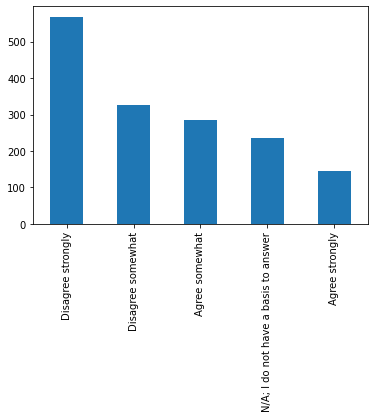

Boxplot and histogram for Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c


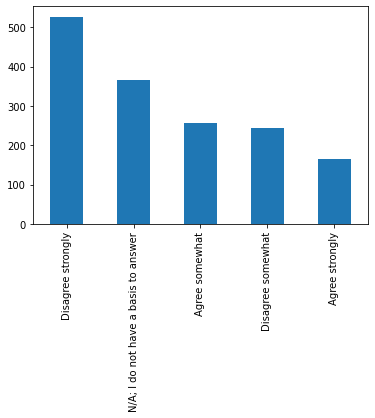

Boxplot and histogram for Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."


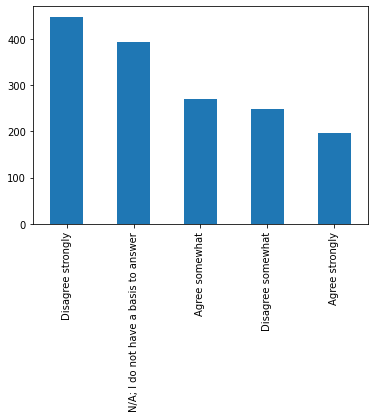

Boxplot and histogram for Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."


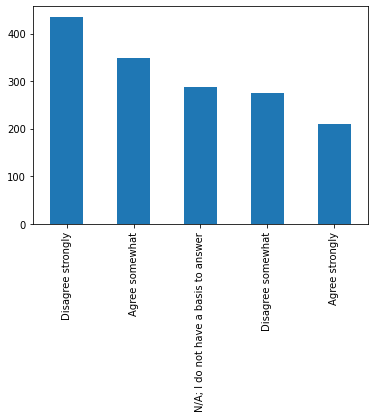

Boxplot and histogram for Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A


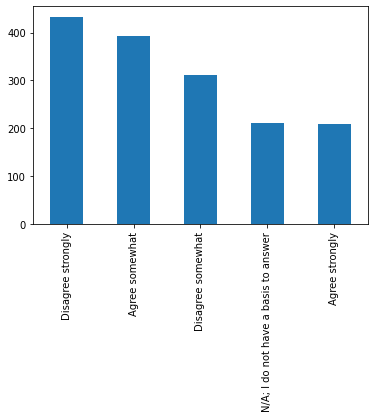

Boxplot and histogram for Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."


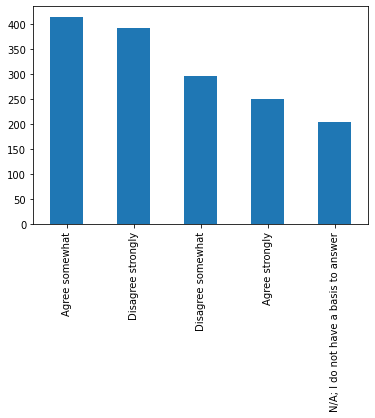

Boxplot and histogram for Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.


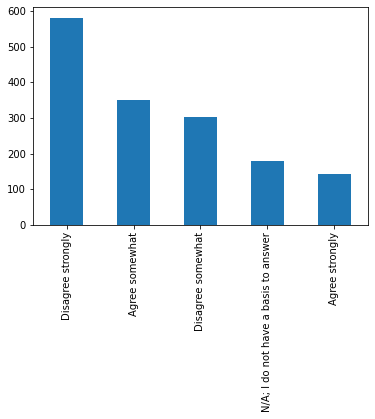

Boxplot and histogram for Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho


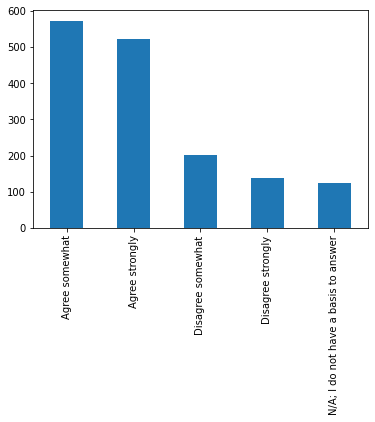

Boxplot and histogram for Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit


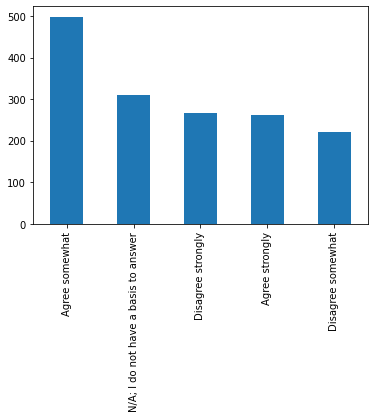

Boxplot and histogram for Q89 - Which of the following is your most frequently used mechanism to get news?


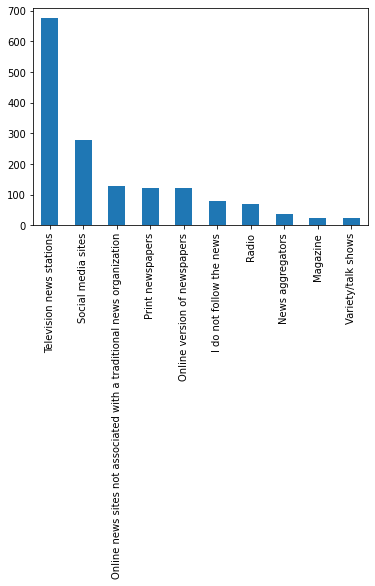

Boxplot and histogram for FINAL WEIGHTS


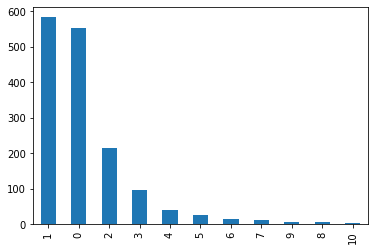

In [34]:
%matplotlib inline
for name in list(df_cat.columns[1:]):
    print('Boxplot and histogram for '+str(name))
    df_cat[str(name)].value_counts().plot(kind='bar')
    plt.show()

## 1.6 Bivariate analysis

In [35]:
# plotting scatter plot for specified columns
def scatter_plot(df, col1,col2):

    # calculating the correlation coefficient
    corr_coef = np.corrcoef(df[col1], df[col2])[0, 1]

    if corr_coef > 0.7:
        corr = 'There is a strong positive correlation'
    elif corr_coef > 0.3:
        corr = 'There is a moderate positive correlation'
    elif corr_coef > -0.3:
        corr = 'There is no correlation'
    elif corr_coef > -0.7:
        corr = 'There is a moderate negative correlation'
    else:
        corr = 'There is a strong negative correlation'

    plt.scatter(df[col1], df[col2], c=custom_colors[4])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

    print("\033[1mAnalysis: \033[0m" + corr + " between " + col1 + " and " + col2 + ".")

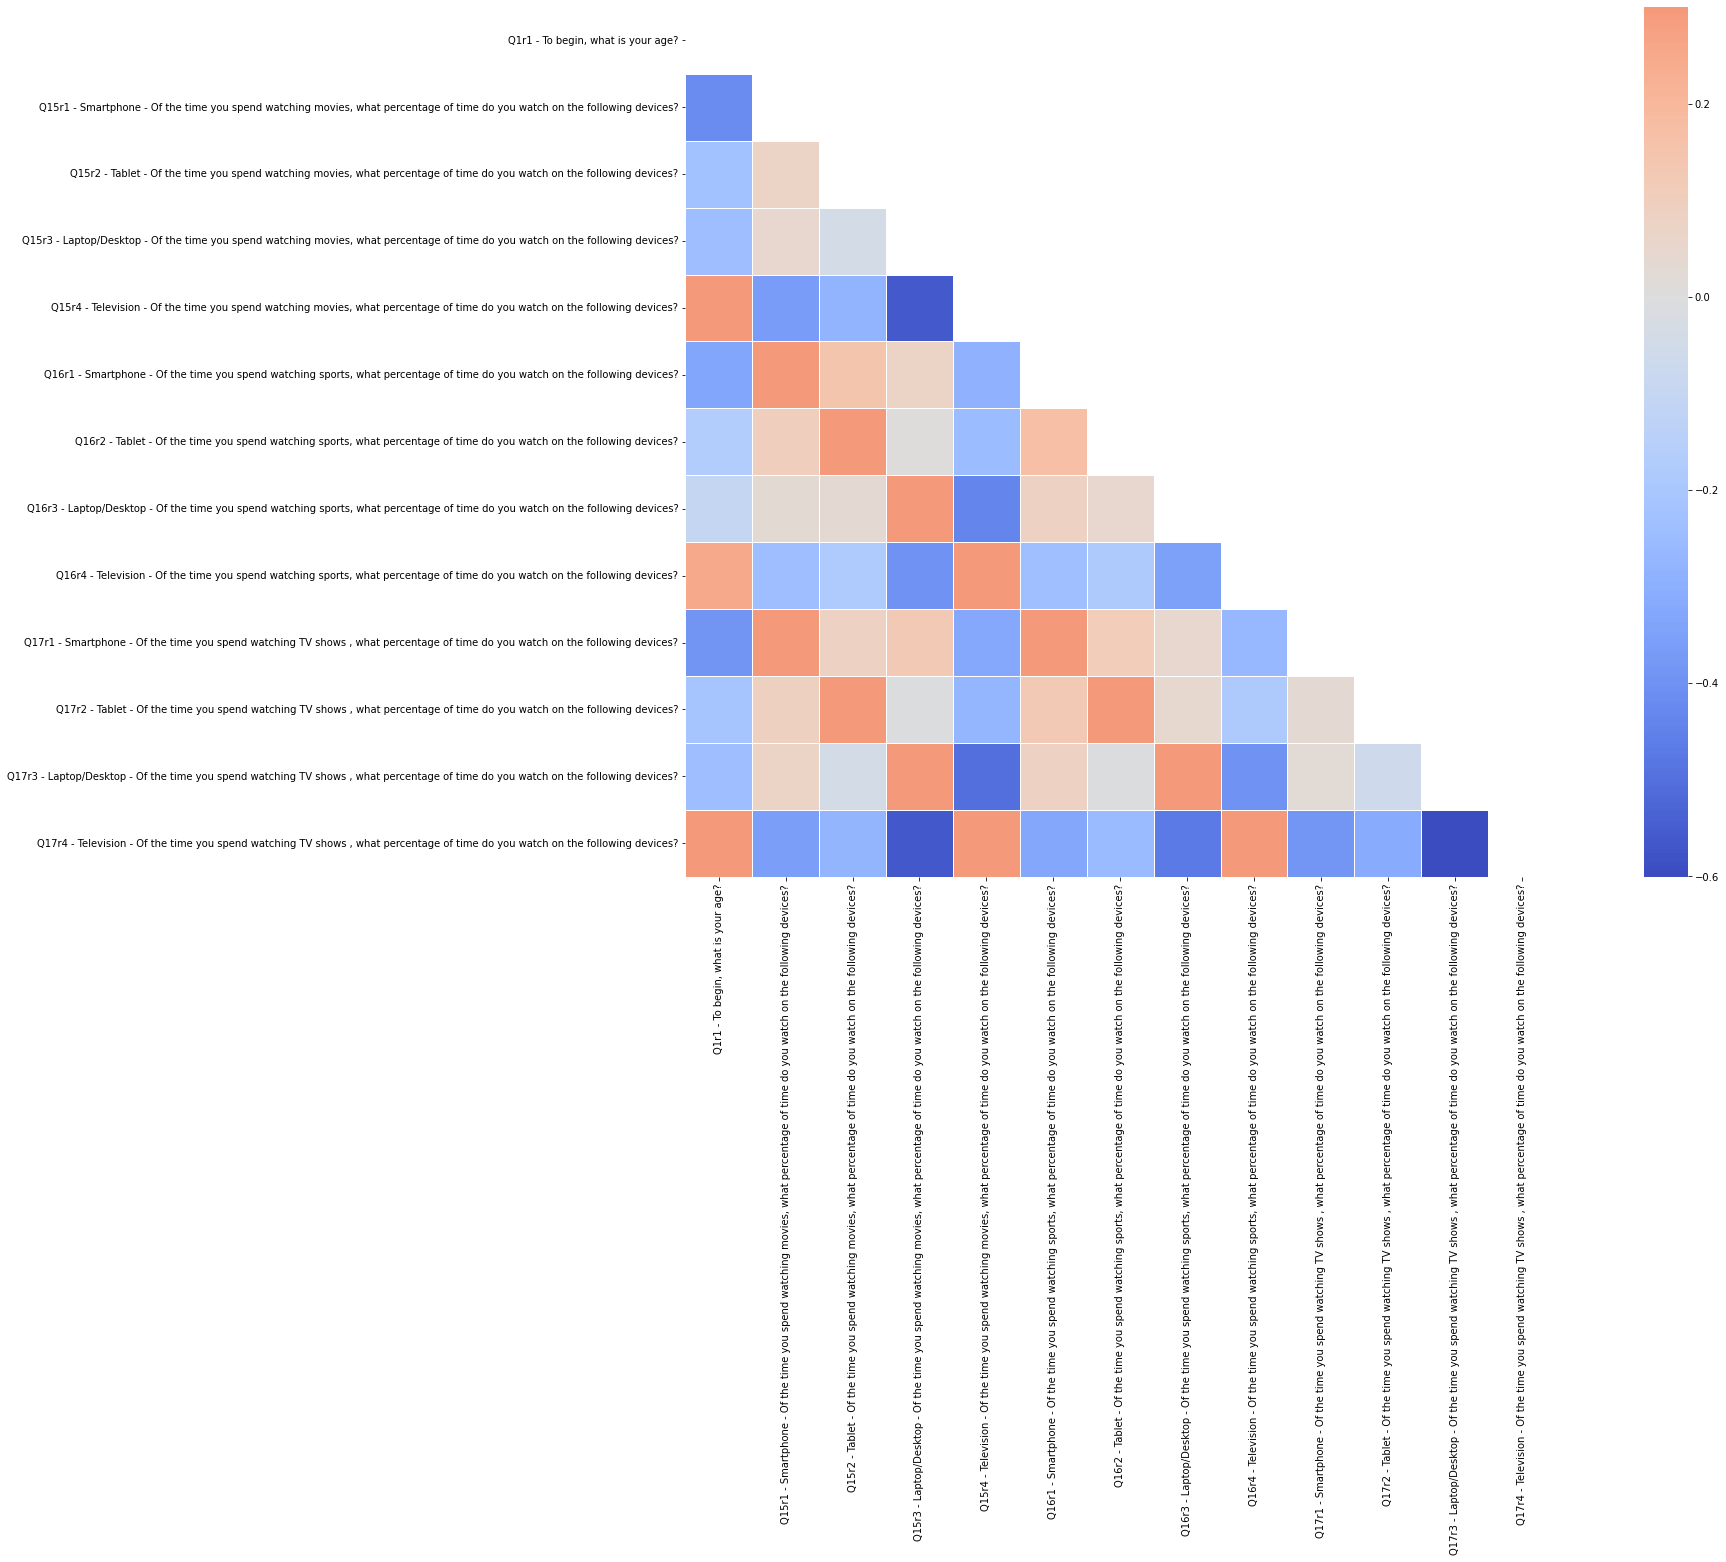

In [36]:
# generating a correlation heatmap
plt.figure(figsize=(32,16))

#calculate the correlation matrix for numerical columns
corr = df_num.astype(float).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

### For the dataset part with categorical data, it does not make much sense to look at the correlations with bivariate analysis. Since the plausible way to do so is to count the value pairs and look at the pair's frequencies, which do not provide much helpful information in this sense.

## Further Bivariate Analysis of features towards target variable

In [37]:
# Treat our outcome column: for ones indicate willing to pay more amount, we treat them as yes - 1 and the rest as no - 0
internet_df['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].unique()

array(['I am willing to pay $20 per month on top of what I already pay',
       'I am willing to pay $5 per month on top of what I already pay',
       'I am willing to pay $10 per month on top of what I already pay',
       'I prefer faster speed but I am unwilling to pay more than I already do',
       'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs',
       'I am willing to pay $30 or more per month on top of what I already pay'],
      dtype=object)

In [38]:
# Replace Yes by 1 and No by 0
internet_df['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].replace({'I am willing to pay $20 per month on top of what I already pay':1,'I am willing to pay $5 per month on top of what I already pay':1,'I am willing to pay $10 per month on top of what I already pay':1,'I am willing to pay $30 or more per month on top of what I already pay':1,'I prefer faster speed but I am unwilling to pay more than I already do':0,'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs':0},inplace=True)

### Gender vs Williness to pay

In [54]:
def plot_bar(df, feat_x, feat_y,colors,s,normalize=True):
    ct = pd.crosstab(df[feat_x], feat_y)
    return ct.plot(kind='bar', stacked=s,color=colors)

In [110]:
def plot_barh(df, feat_x, feat_y,colors,s,normalize=True):
    ct = pd.crosstab(df[feat_x], feat_y)
    return ct.plot(kind='barh', stacked=s,color=colors)

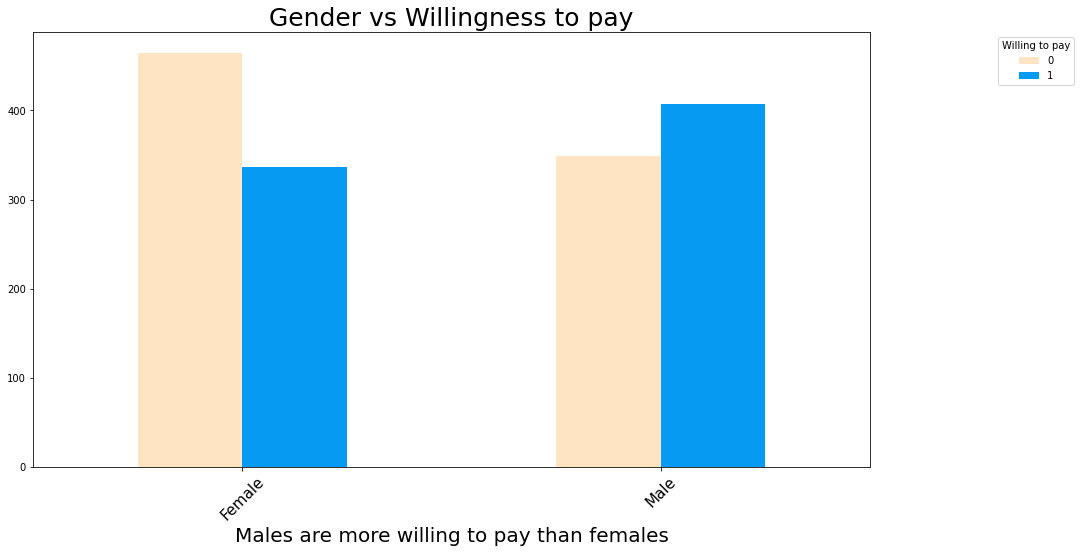

In [72]:
plot_bar(internet_df, 'Q4 - What is your gender?', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],False)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation=45)
plt.title('Gender vs Willingness to pay', fontsize=25)
plt.xlabel('Males are more willing to pay than females', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

### Age vs Williness to pay

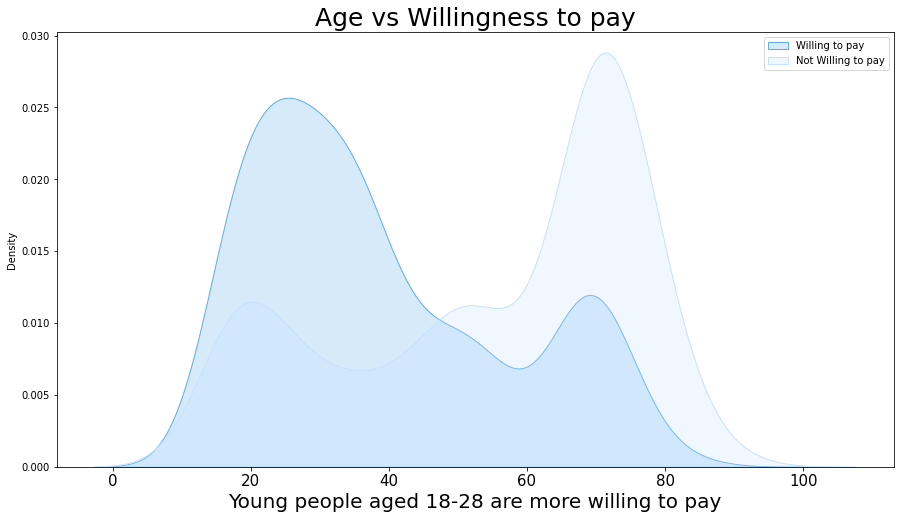

In [78]:
sns.kdeplot(internet_df['Q1r1 - To begin, what is your age?'].astype(float)[internet_df.iloc[:,116,] == 1], color="#5CACEE", shade=True)
sns.kdeplot(internet_df['Q1r1 - To begin, what is your age?'].astype(float)[internet_df.iloc[:,116,] == 0], color="#C6E2FF", shade=True)
plt.legend(['Willing to pay', 'Not Willing to pay'])
plt.gcf().set_size_inches(15,8)
plt.title('Age vs Willingness to pay', fontsize=25)
plt.xlabel('Young people aged 18-28 are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

### Region vs Willingness to pay

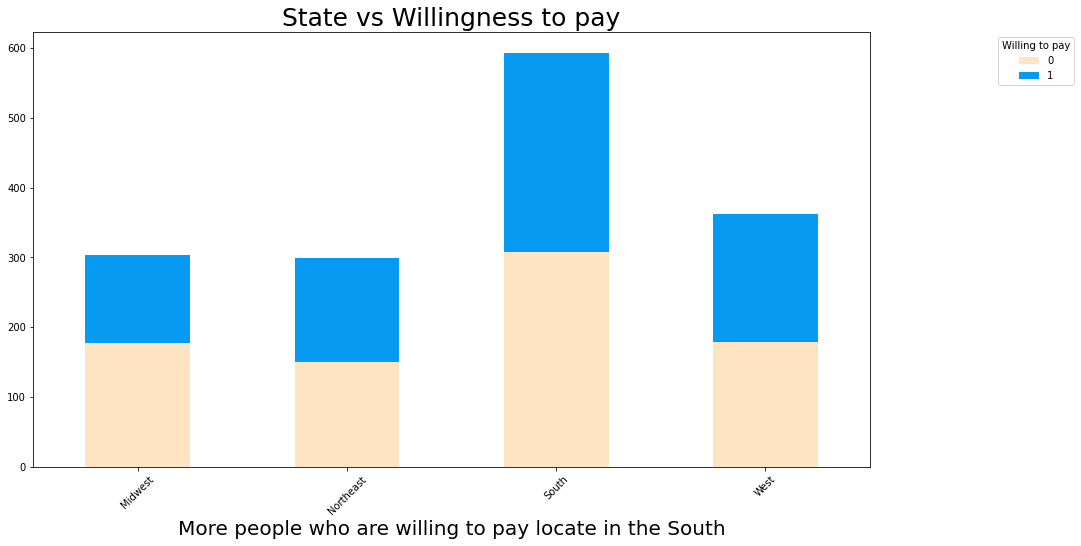

In [87]:
plot_bar(internet_df, 'region - Region', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation=45)
plt.title('State vs Willingness to pay', fontsize=25)
plt.xlabel('More people who are willing to pay locate in the South', fontsize=20)
plt.xticks(fontsize=10)
plt.show()

### State vs Willingness to pay

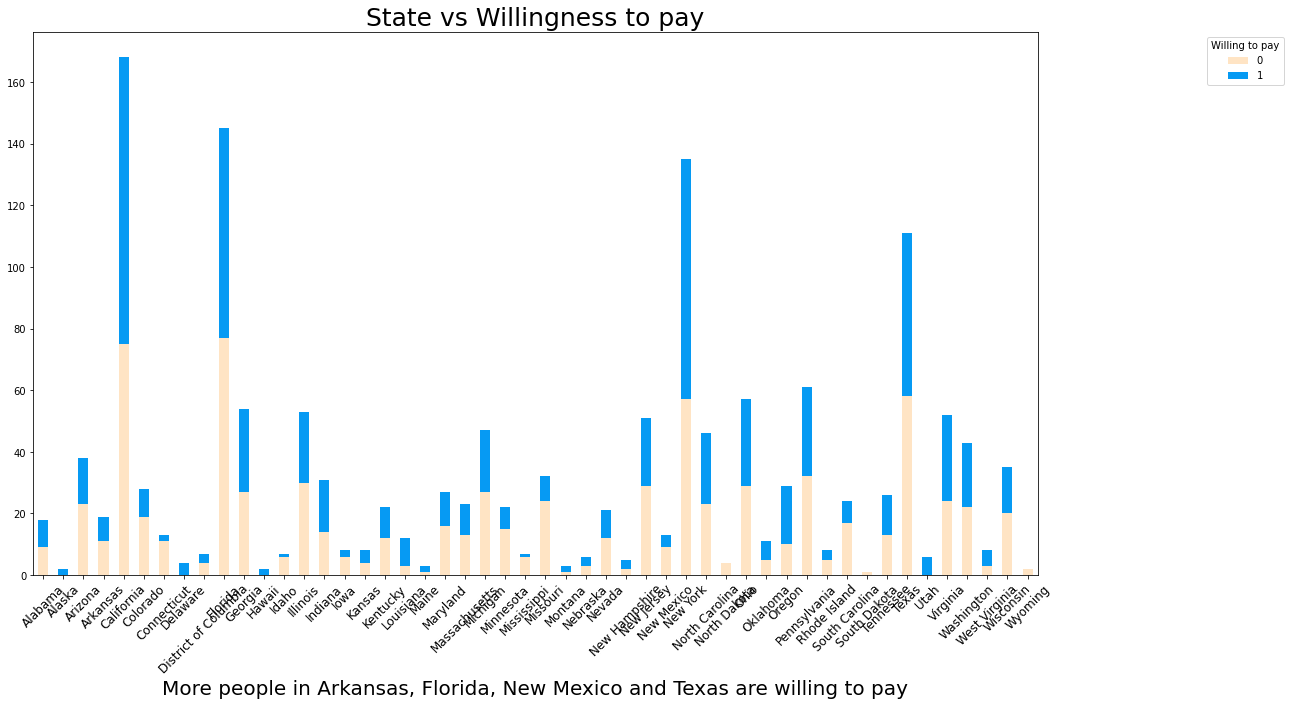

In [88]:
plot_bar(internet_df, 'Q2 - In which state do you currently reside?', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(18,10)
plt.xticks(rotation=45)
plt.title('State vs Willingness to pay', fontsize=25)
plt.xlabel('More people in Arkansas, Florida, New Mexico and Texas are willing to pay', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

### Employment status vs Willingness to pay

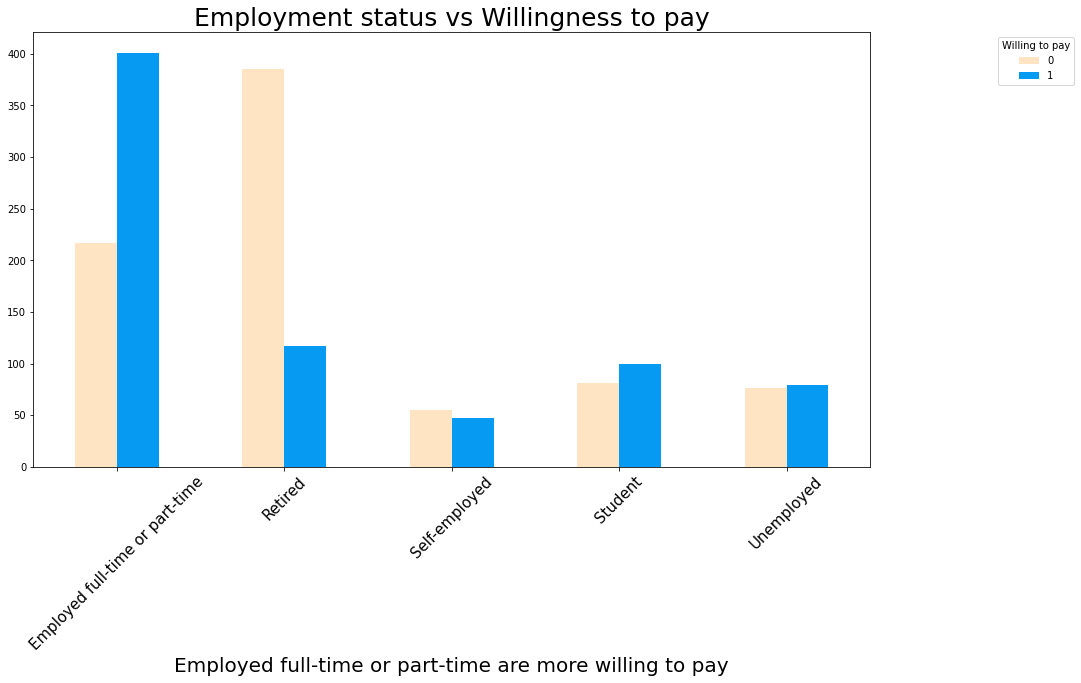

In [91]:
plot_bar(internet_df, 'QNEW3 - What is your employment status?', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],False)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation=45)
plt.title('Employment status vs Willingness to pay', fontsize=25)
plt.xlabel('Employed full-time or part-time are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

### Ethnicity vs Willingness to pay

In [92]:
internet_df['Q5 - Which category best describes your ethnicity?'].unique()

array(['White or Caucasian (Non-Hispanic)', 'African American',
       'South Asian (India, Pakistan, Sri Lanka)',
       'Something else not listed here', 'Hispanic', 'Caribbean',
       'East Asian or Southeast Asian',
       'Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)',
       'Multiracial', 'Middle Eastern'], dtype=object)

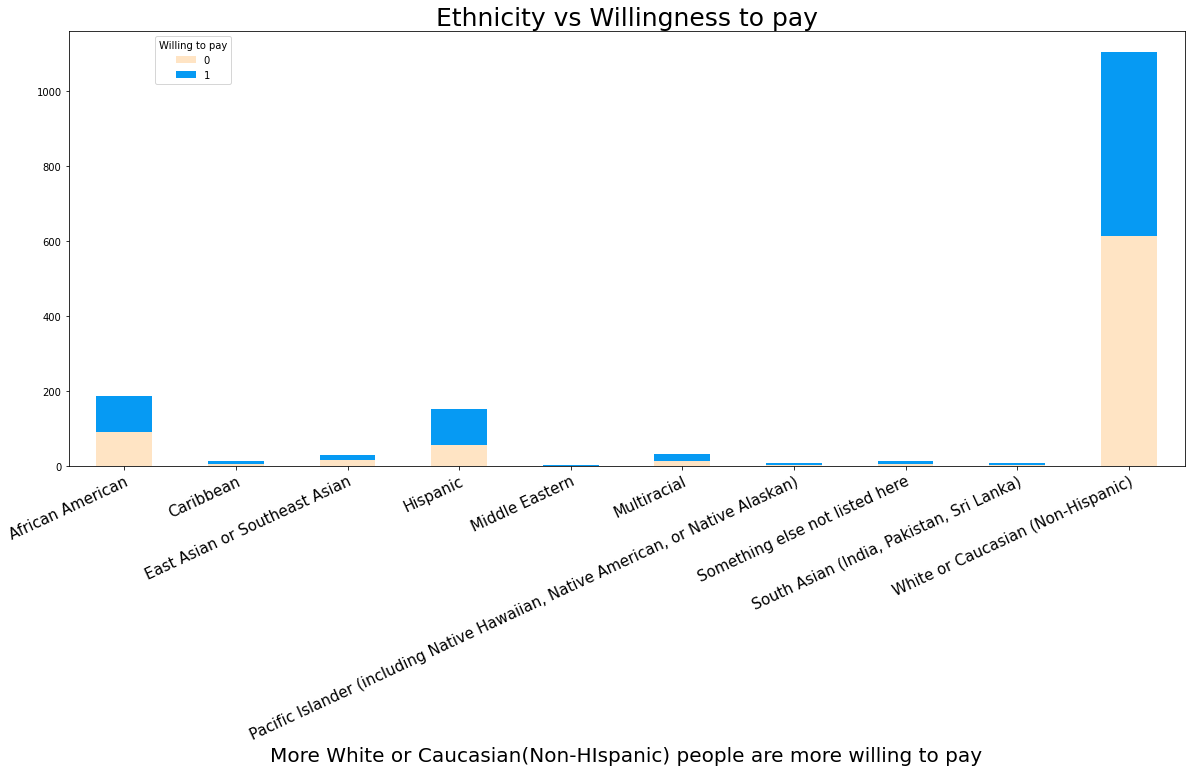

In [146]:
plot_bar(internet_df, 'Q5 - Which category best describes your ethnicity?', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(0.15,1))
plt.gcf().set_size_inches(20,8)
plt.xticks(rotation=25, fontsize=15, ha='right', wrap=True)
plt.title('Ethnicity vs Willingness to pay', fontsize=25)
plt.xlabel('More White or Caucasian(Non-HIspanic) people are more willing to pay', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

### Income vs Willingness to pay

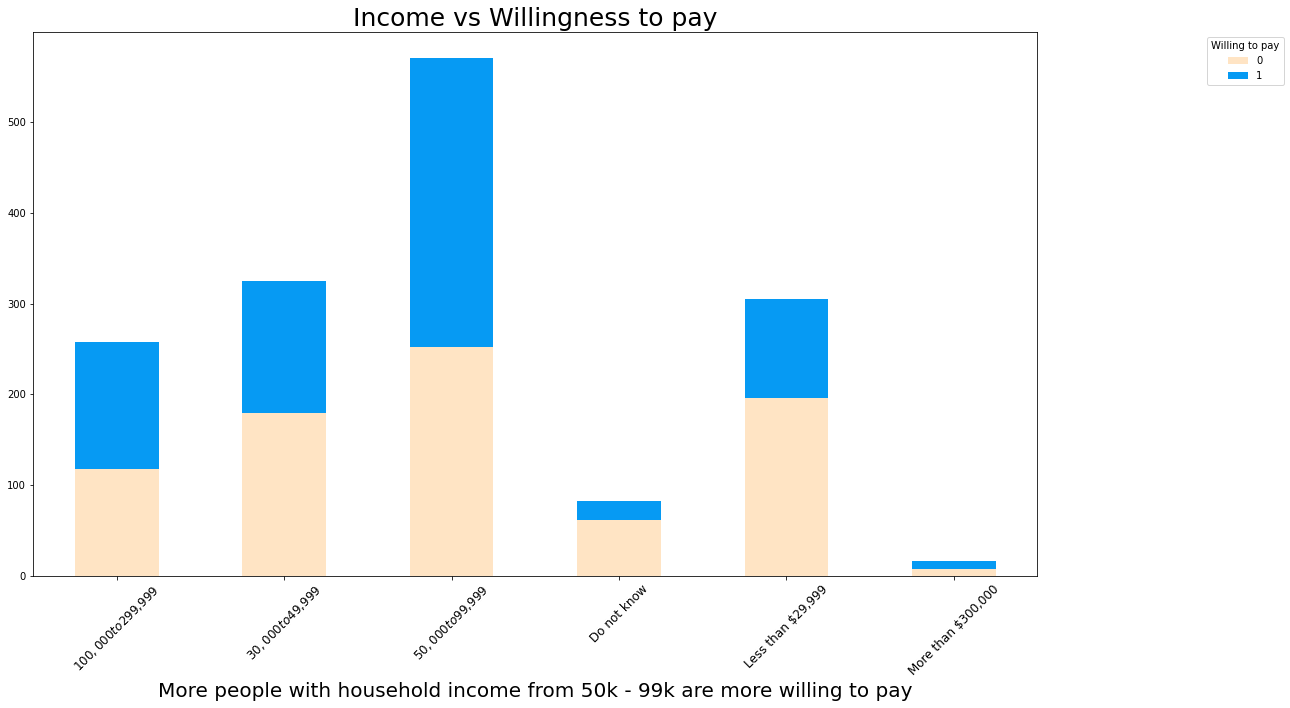

In [147]:
plot_bar(internet_df, 'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.', internet_df.iloc[:,116,],["#FFE4C4","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(18,10)
plt.xticks(rotation=45)
plt.title('Income vs Willingness to pay', fontsize=25)
plt.xlabel('More people with household income from 50k - 99k are more willing to pay', fontsize=20)
plt.xticks(fontsize=12)
plt.show()

### App use on smartphone vs Willingness to pay

In [187]:
Q22_df = internet_df.iloc[:,65:102]

In [188]:
# Rename the columns
Q22_df.rename(columns=lambda x: x.replace('Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-', ''), inplace=True)

In [196]:
Q22_Q29_df = pd.concat([Q22_df,internet_df.iloc[:,116,]], axis = 1)

In [190]:
#filter out the rows with target variable = 1
df_Q22_Q29_1 = Q22_Q29_df[Q22_Q29_df.iloc[:,-1] == 1]

In [191]:
# Check each row of the data frame by column for rows with target variable = 1
freq_dict1 = {}
for i in range(37):
    freq_dict1[df_Q22_Q29_1.columns[i]] = 0
    for j in range(744):
        if df_Q22_Q29_1.iloc[j, i] == 'Yes':
            freq_dict1[df_Q22_Q29_1.columns[i]] += 1

In [192]:
#filter out the rows with target variable = 0
df_Q22_Q29_0 = Q22_Q29_df[Q22_Q29_df.iloc[:,-1] == 0]

In [193]:
# Check each row of the data frame by column for rows with target variable = 1
freq_dict0 = {}
for i in range(37):
    freq_dict0[df_Q22_Q29_0.columns[i]] = 0
    for j in range(814):
        if df_Q22_Q29_0.iloc[j, i] == 'Yes':
            freq_dict0[df_Q22_Q29_0.columns[i]] += 1

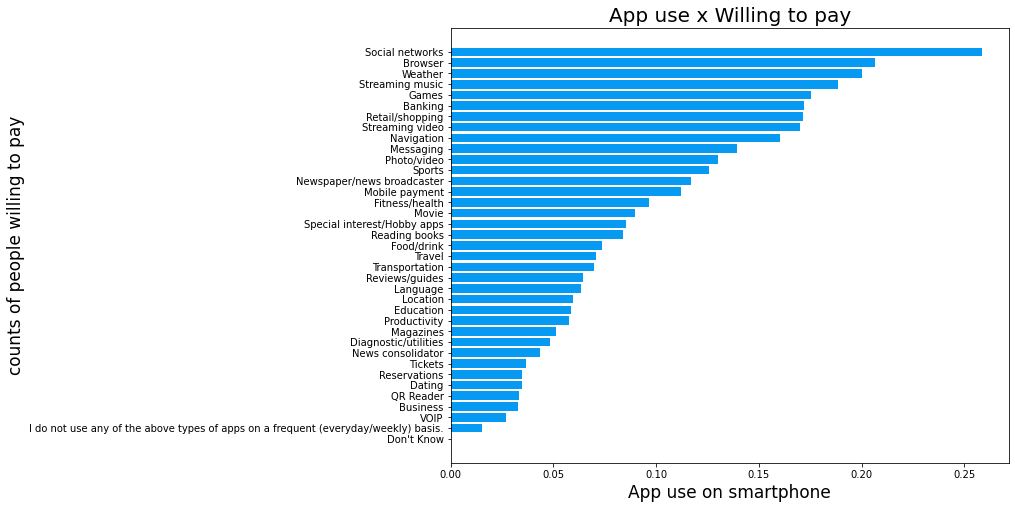

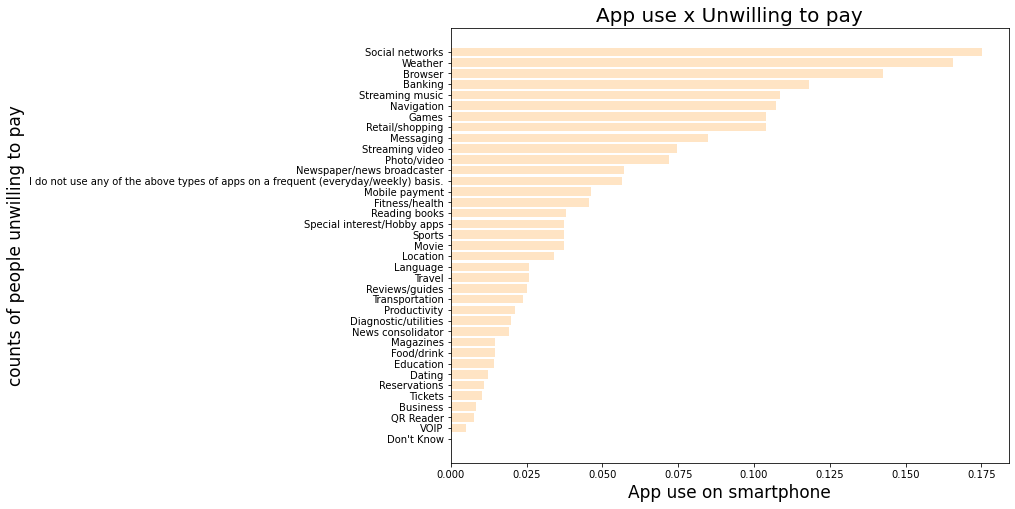

In [208]:
# Draw a horizontal bar chart for people willing to pay
s = len(Q22_df)
sorted_freq_dict = {k: v / s for k, v in sorted(freq_dict1.items(), key=lambda item: item[1], reverse=False)}
plt.figure(figsize=(10, 8))
plt.barh(list(sorted_freq_dict.keys()), list(sorted_freq_dict.values()), color='#069AF3')
plt.title('App use x Willing to pay', fontsize=20)
plt.xlabel('App use on smartphone', fontsize=17)
plt.ylabel('counts of people willing to pay', fontsize=17)

# Draw a horizontal bar chart for people unwilling to pay
sorted_freq_dict0 = {k: v / s for k, v in sorted(freq_dict0.items(), key=lambda item: item[1], reverse=False)}
plt.figure(figsize=(10, 8))
plt.barh(list(sorted_freq_dict0.keys()), list(sorted_freq_dict0.values()), color='#FFE4C4')
plt.title('App use x Unwilling to pay', fontsize=20)
plt.xlabel('App use on smartphone', fontsize=17)
plt.ylabel('counts of people unwilling to pay', fontsize=17)
plt.show()

### Time spent on watching sports on Tablet vs Willingness to pay

## 1.8 Feature Selection

In [ ]:
# cols_to_include = ['Q1r1 - To begin, what is your age?', 'Q4 - What is your gender?',
#        'Q2 - In which state do you currently reside?',
#        'QNEW3 - What is your employment status?',
#        'Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.',
#        'Q11r10 - Laptop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to rank.  The fir',
#        'Q11r15 - Smartphone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in th',
#        'Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
#        'Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
#        'Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
#        'Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
#        'Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
#        'Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
#        'Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
#        'Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
#        'Q17r1 - Smartphone - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?',
#        'Q17r2 - Tablet - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?',
#        'Q17r3 - Laptop/Desktop - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?',
#        'Q17r4 - Television - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Photo/video',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Banking',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Fitness/health',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Food/drink',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Retail/shopping',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Navigation',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Social networks',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reading books',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Streaming music',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Streaming video',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reviews/guides',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-News consolidator',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Newspaper/news broadcaster',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Magazines',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Diagnostic/utilities',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-QR Reader',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Travel',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Transportation',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Location',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Language',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Movie',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Business',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Games',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Productivity',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Sports',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Weather',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Browser',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-VOIP',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Dating',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Messaging',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Mobile payment',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Education',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Tickets',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reservations',
#        'Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Special interest/Hobby apps',
#        'Q26 - Which of the following subscriptions does your household purchase?-Pay TV (traditional cable and/or satellite bundle)',
#        'Q26 - Which of the following subscriptions does your household purchase?-Home internet',
#        'Q26 - Which of the following subscriptions does your household purchase?-Landline telephone',
#        'Q26 - Which of the following subscriptions does your household purchase?-Mobile voice (smartphone or basic mobile phone calling plan)',
#        'Q26 - Which of the following subscriptions does your household purchase?-Mobile data plan',
#        'Q26 - Which of the following subscriptions does your household purchase?-Streaming video service',
#        'Q26 - Which of the following subscriptions does your household purchase?-Streaming music service',
#        'Q26 - Which of the following subscriptions does your household purchase?-Gaming',
#        'Q26 - Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)',
#        'Q26 - Which of the following subscriptions does your household purchase?-Magazine (print or digital)',
#        'Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to r',
#        'Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?',
#        'Q73r4 - Browse and surf the Web - Which are things you typically do while watching your home television system?',
#        'Q73r5 - Microblogging - Which are things you typically do while watching your home television system?',
#        'Q73r6 - Read email - Which are things you typically do while watching your home television system?',
#        'Q73r7 - Write email - Which are things you typically do while watching your home television system?',
#        'Q73r9 - Use a social network - Which are things you typically do while watching your home television system?',
#        'Q73r11 - Browse for products and services online - Which are things you typically do while watching your home television system?',
#        'Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?',
#        'Q73r13 - Play video games - Which are things you typically do while watching your home television system?']

# cols_to_exclude = set(df_final.columns) - set(cols_to_include)
# df_final = df_final.drop(cols_to_exclude, axis=1)

In [ ]:
internet_df.shape

# Further cleaning of data: One Hot Encoding

### Binary encoding

In [ ]:
# Replace Yes by 1 and No by 0
internet_df.replace({'Yes':1,'No':0},inplace=True)

In [ ]:
internet_df

In [ ]:
internet_df.head()

In [ ]:
# Drop the final column called "weights" that does not contribute useful information to following analysis
internet_df.drop(columns="FINAL WEIGHTS", inplace=True)

In [ ]:
# Create a new DataFrame with one-hot encoded columns
# one_hot_cols = list(pd.concat([df_final.iloc[:,1:5],df_final.iloc[:,66:74]],axis=1).columns)
one_hot_cols = list(pd.concat([internet_df.iloc[:,1:7],internet_df.iloc[:,8,],internet_df.iloc[:,119:130,],internet_df.iloc[:,131:,]],axis=1).columns)
one_hot_df = pd.get_dummies(internet_df[one_hot_cols])

# Combine the original DataFrame with the one-hot encoded DataFrame
new_df = pd.concat([internet_df, one_hot_df], axis=1)

In [ ]:
# Drop the original columns that were one-hot encoded
new_df.drop(columns=one_hot_cols, inplace=True)

In [ ]:
new_df.head()

In [ ]:
new_df.to_csv("data/Preprocessed data.csv", index=None)